In [612]:
import pandas as pd
import glob
import os
import warnings

# --- 1. SOPPRESSIONE DEI WARNING ---
# Ignora il warning specifico di openpyxl
warnings.filterwarnings("ignore", category=UserWarning, module="openpyxl")
print("I warning di openpyxl sono stati soppressi.")

# --- 1. CONFIGURAZIONE E DEFINIZIONE PERCORSI ---

# !!! IMPORTANTE: DEVI MODIFICARE QUESTI PERCORSI !!!
# Assicurati che questi puntino alle cartelle contenenti i file CSV PRE e POST.
# Esempio: path_pre_folder = './dati_pre/'
path_pre_folder = 'pre'  # Ad esempio, se i file sono nella stessa cartella del notebook
path_post_folder = 'post' # Ad esempio, se i file sono nella stessa cartella del notebook

# Colonne ID
MERGE_KEY_PRE = 'Q36'
MERGE_KEY_POST = 'Q28'
FINAL_MERGE_KEY = MERGE_KEY_PRE # useremo Q36 come nome della colonna ID finale

print("Configurazione avviata. Percorsi da verificare.")
print("-" * 50)


# --- 2. ELABORAZIONE DATI PRE: CONCATENA E ORDINA ---

print("Passaggio 2: Elaborazione dei dati PRE...")

# Trova tutti i file XLSX nella cartella PRE
all_pre_files = glob.glob(os.path.join(path_pre_folder, '*.xlsx')) 

# Lista per contenere i DataFrame
list_pre = []
for filename in all_pre_files:
    df = pd.read_excel(filename)
    list_pre.append(df)

# Concatenazione dei file PRE
df_pre_combined = pd.concat(list_pre, ignore_index=True)

# Ordinamento per ID (Q36)
df_pre_combined = df_pre_combined.sort_values(by=MERGE_KEY_PRE).reset_index(drop=True).iloc[:-2]

print(f"Concatenazione PRE completata. Righe totali: {len(df_pre_combined)}")

print(df_pre_combined[MERGE_KEY_PRE].tolist())
print("-" * 50)


# --- 3. ELABORAZIONE DATI POST: CONCATENA E ORDINA ---

print("Passaggio 3: Elaborazione dei dati POST...")

# Trova tutti i file XLSX nella cartella POST
all_post_files = glob.glob(os.path.join(path_post_folder, '*.xlsx'))

list_post = []
for filename in all_post_files:
    df = pd.read_excel(filename)
    list_post.append(df)

# Concatenazione dei file POST
df_post_combined = pd.concat(list_post, ignore_index=True)

# Rinominare l'ID del POST (Q28) per il merge
df_post_combined.rename(columns={MERGE_KEY_POST: FINAL_MERGE_KEY}, inplace=True)

# Ordinamento per ID (ora Q36)
df_post_combined = df_post_combined.sort_values(by=FINAL_MERGE_KEY).reset_index(drop=True).iloc[:-2]

print(f"Concatenazione POST completata. Righe totali: {len(df_post_combined)}")
print(df_post_combined[FINAL_MERGE_KEY].tolist())
print("-" * 50)


# --- 4. MERGE FINALE: PRE COMBINATO + POST COMBINATO ---

print("Passaggio 4: Merge finale Pre e Post...")

# Merge dei due dataset combinati.
# Utilizziamo un inner join per mantenere solo i partecipanti che hanno risposto sia al PRE che al POST.
merged_df = pd.merge(
    df_pre_combined, 
    df_post_combined, 
    on=FINAL_MERGE_KEY, 
    how='inner', 
    suffixes=('_Pre', '_Post')
)

# Ordinamento finale per ID
merged_df = merged_df.sort_values(by=FINAL_MERGE_KEY).reset_index(drop=True)

print(f"\nMERGE FINALE completato. Partecipanti appaiati: {len(merged_df)}")
print(f"Le colonne Likert del PRE ora finiscono con '_Pre' (es. Q29_1_Pre).")
print(f"Le colonne Likert del POST ora finiscono con '_Post' (es. Q12_1_Post).")

print("\nDataFrame finale (ordinate per ID):")
print(merged_df[FINAL_MERGE_KEY].tolist())

I warning di openpyxl sono stati soppressi.
Configurazione avviata. Percorsi da verificare.
--------------------------------------------------
Passaggio 2: Elaborazione dei dati PRE...
Concatenazione PRE completata. Righe totali: 34
['201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '231', '232', '233', '234', '235']
--------------------------------------------------
Passaggio 3: Elaborazione dei dati POST...
Concatenazione POST completata. Righe totali: 34
['201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '231', '232', '233', '234', '235']
--------------------------------------------------
Passaggio 4: Merge finale Pre e Post...

MERGE FINALE completato. Partecipanti appaiati: 34
Le 

In [613]:
# ==============================================================================
# 2. CARICAMENTO DEL FOGLIO EXCEL
# ==============================================================================

# ⚠️ INSERISCI QUI IL PERCORSO AL TUO FILE EXCEL
file_excel_path = "../decider/qualtrics/COCOA.xlsx"

try:
    # Carica il foglio Excel nel DataFrame
    excel_df = pd.read_excel(file_excel_path)
    
except FileNotFoundError:
    print(f"ATTENZIONE: File '{file_excel_path}' non trovato. Uso i dati di esempio.")
    
    # ⚠️ Dati di esempio per simulare il contenuto del foglio Excel
    dati_excel = {
        'ID': [1001, 1003, 1005, 9999], # ID che coincidono e uno extra (9999)
        'Personalizzato': ['SI', 'NO', 'SI', 'SI'],
        'Extra_Info': ['X', 'Y', 'Z', 'W']
    }
    excel_df = pd.DataFrame(dati_excel)

print("DataFrame dal Foglio Excel (excel_df):")
print(excel_df)
print("-" * 30)

# Assicurati che le chiavi di unione siano stringhe in entrambi i DataFrame
merged_df['Q36'] = merged_df['Q36'].astype(str)
excel_df['ID'] = excel_df['ID'].astype(str)

print("Tipo colonna Q36 (merged_df):", merged_df['Q36'].dtype)
print("Tipo colonna ID (excel_df):", excel_df['ID'].dtype)
print("-" * 30)

# ==============================================================================
# 3. ESECUZIONE DEL MERGE
# ==============================================================================

# Unione del merged_df con le colonne 'ID' e 'Personalizzato' del foglio Excel.
# 'how=left' assicura che tutte le righe del merged_df originale rimangano.
df_finale = pd.merge(
    merged_df,
    excel_df[['ID', 'Personalizzato']], # Seleziona solo ID e Personalizzato
    left_on='Q36',                      # Chiave nel tuo df originale
    right_on='ID',                      # Chiave nel foglio Excel
    how='left'                          
)

# ==============================================================================
# 4. PULIZIA (Rimozione della colonna ID duplicata)
# ==============================================================================

# Dopo il merge, la colonna 'ID' del foglio Excel è ridondante (è un duplicato di 'Q36')
# e può essere rimossa per mantenere il DataFrame pulito.
merged_df = df_finale.drop(columns=['ID'])


# ==============================================================================
# RISULTATO FINALE
# ==============================================================================
print("DataFrame Finale dopo il Merge:")
print(merged_df["Personalizzato"].tolist())

# NOTA: Dove non c'è corrispondenza di ID (es. 1002, 1004), 
# la colonna 'Personalizzato' assume il valore NaN (Not a Number, dato mancante).

DataFrame dal Foglio Excel (excel_df):
                 Nome         Cognome   ID Personalizzato  \
0           Francesco      Sorrentino  202             NO   
1             Alessia         Vastola  203             NO   
2              Carmen        Barbesco  201             NO   
3            Beatrice        Schisano  204             NO   
4             Giacomo           Zezza  205             NO   
5                Luca         Alterio  206             NO   
6              Simone        Giuliana  207             NO   
7              Adrian   Ciprian Iancu  208             NO   
8            Gabriele          Alzati  209             NO   
9            Federico           Lizzi  210             NO   
10             Matteo       Zitarelli  211             SI   
11              Elisa           Ricci  212             SI   
12              Elisa       Sacchetta  213             SI   
13             Olivia    Vecchiarelli  214             SI   
14               Luca       Rodriguez  215    

In [614]:
colonna_di_interesse = 'Q17' 

# 3. Calcola la frequenza (conteggio) di ogni valore distinto
frequenza_valori = merged_df[colonna_di_interesse].value_counts()

print(f"Distribuzione di frequenza per la colonna '{colonna_di_interesse}':")
print(frequenza_valori)

# Per ottenere anche le frequenze percentuali:
frequenza_percentuale = merged_df[colonna_di_interesse].value_counts(normalize=True) * 100
print("\nFrequenza in percentuale:")
print(frequenza_percentuale)

Distribuzione di frequenza per la colonna 'Q17':
Q17
18-24    13
25-29    11
30-34     5
40+       4
35-39     1
Name: count, dtype: int64

Frequenza in percentuale:
Q17
18-24    38.235294
25-29    32.352941
30-34    14.705882
40+      11.764706
35-39     2.941176
Name: proportion, dtype: float64


In [615]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configurazione standard per lo stile dei grafici
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Imposta una dimensione predefinita

def bar_plot(colonna_categorica):

    # Calcola le frequenze (o le percentuali se preferisci)
    # Se vuoi le percentuali, aggiungi: normalize=True
    frequenze = merged_df[colonna_categorica].value_counts().reset_index()
    frequenze.columns = [colonna_categorica, 'Conteggio']

    # Creazione del Grafico a Barre
    plt.figure(figsize=(12, 7))
    sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')

    plt.title(f'Distribuzione delle Risposte per {colonna_categorica}', fontsize=16)
    plt.xlabel('Frequenza Assoluta (N)', fontsize=12)
    plt.ylabel('Opzione di Risposta', fontsize=12)
    plt.tight_layout() # Adatta il layout per non tagliare le etichette
    plt.show()

C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


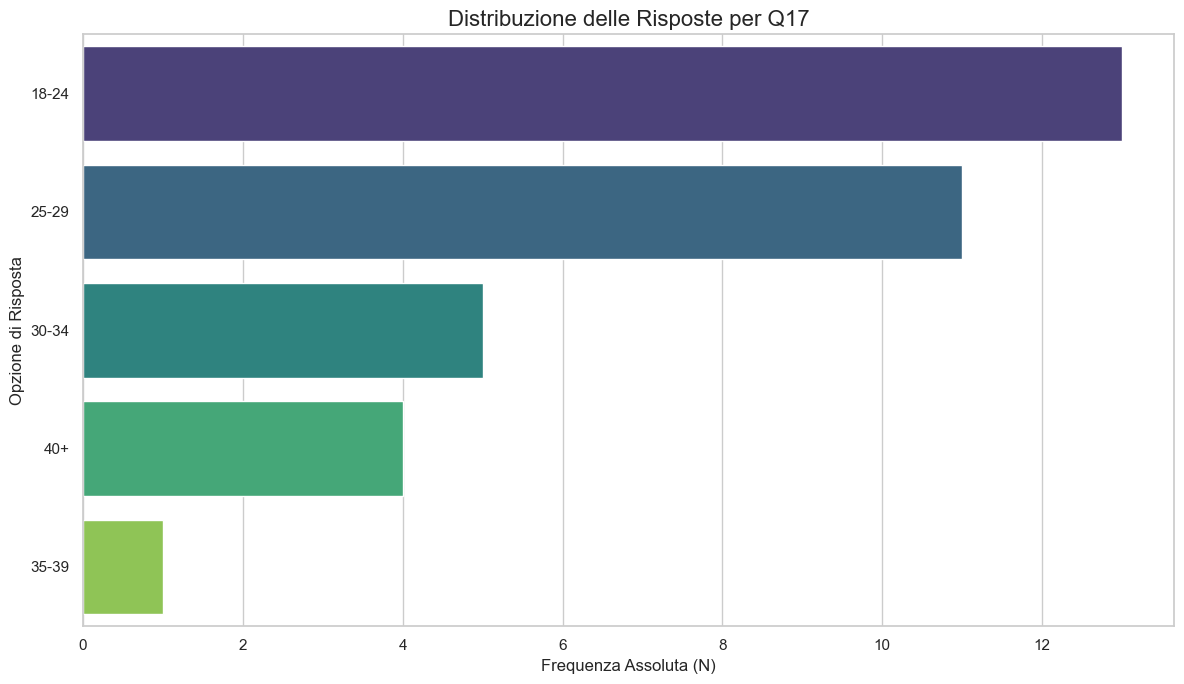

In [616]:
bar_plot("Q17")

C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


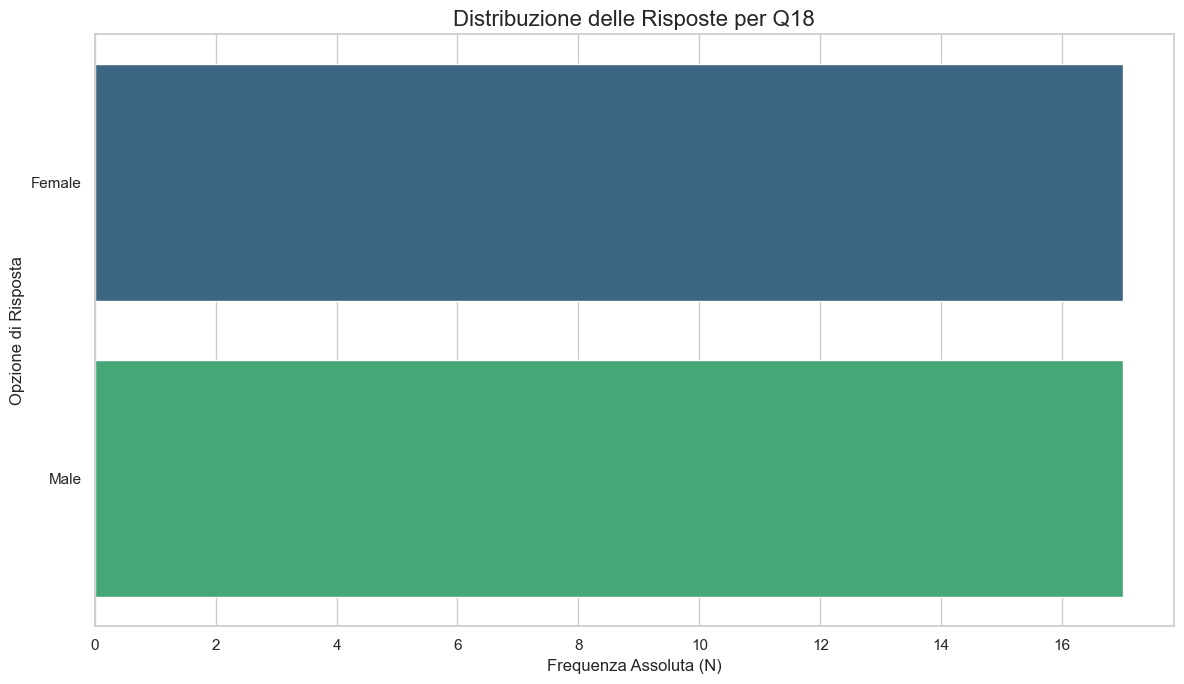

In [617]:
bar_plot("Q18")

In [618]:
merged_df["Q24"] = merged_df["Q24"].astype(str).str.strip().str.lower()

# b. Mappatura: Correzione di varianti ed errori di battitura
mapping = {
    'italia': 'italy',
    'italt': 'italy',
    # Aggiungi qui altre correzioni se necessario (es. 'romania ' -> 'romania')
}
merged_df['Q24'] = merged_df['Q24'].replace(mapping)

# c. Standardizzazione: Capitalizza per il formato finale ("Italy", "Romania")
merged_df['Q24'] = merged_df['Q24'].str.capitalize()

C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


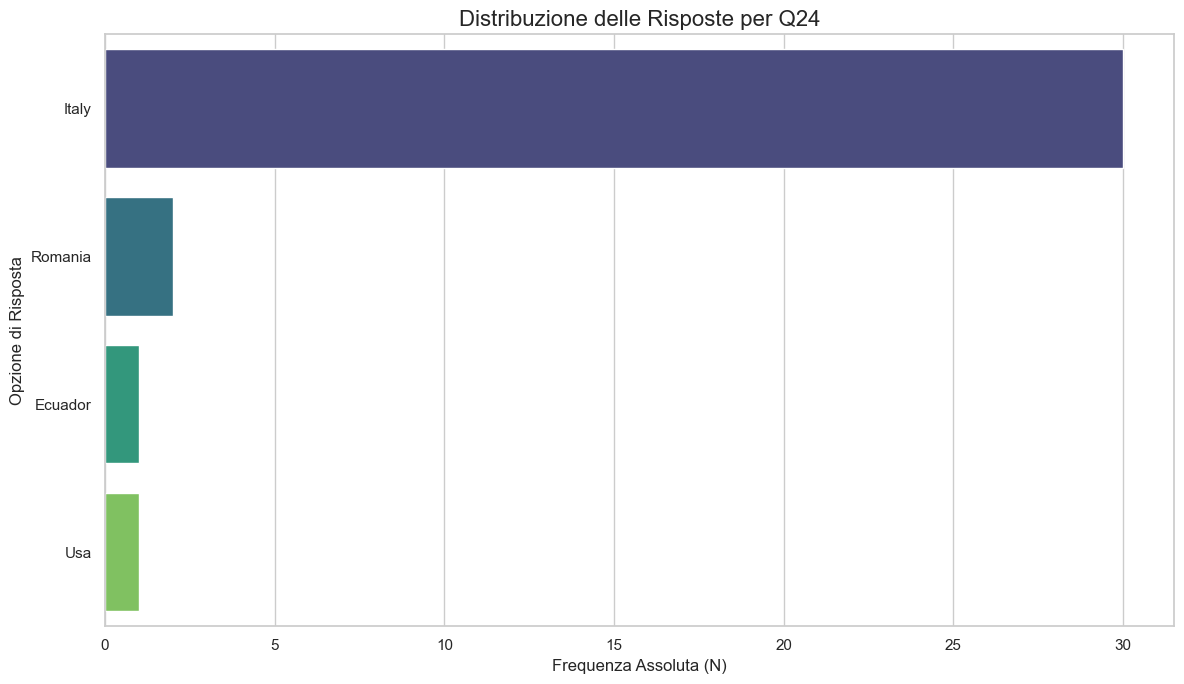

In [619]:
bar_plot("Q24")

C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


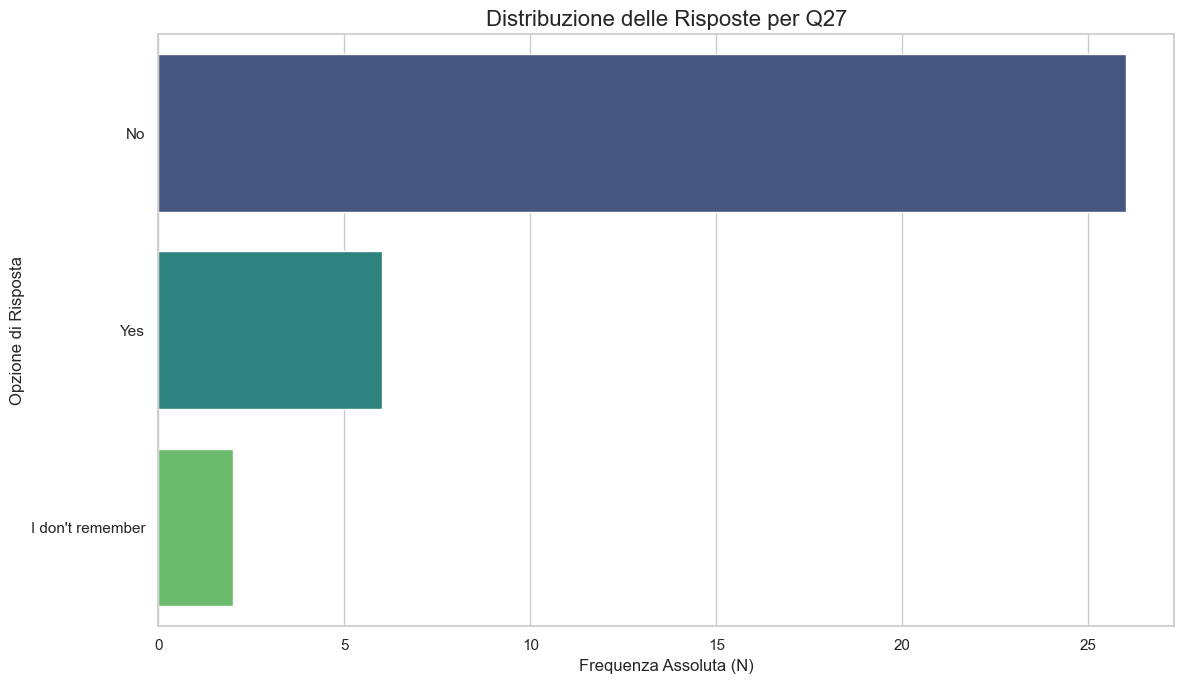

In [620]:
bar_plot("Q27")

C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\2402683556.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Conteggio', y=colonna_categorica, data=frequenze, palette='viridis')


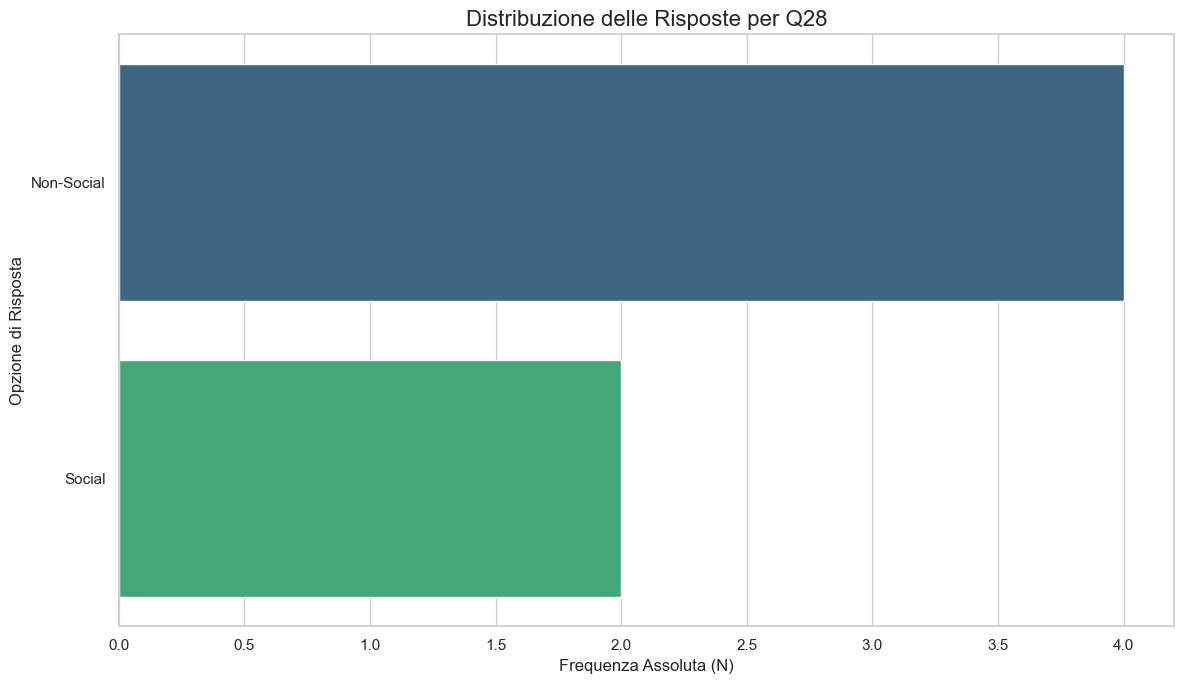

In [621]:
bar_plot("Q28")

In [622]:
import numpy as np

# === 1. Funzione per calcolare i punteggi OCEAN dai file raw ===
def calcola_OCEAN_da_raw(df):
    """
    Legge tutti i file Excel in una cartella, calcola i punteggi OCEAN (Big Five)
    a partire dalle 15 domande (Q29_1...Q29_15), e restituisce un DataFrame.
    """
    likert_scale = {
        "strongly disagree": 1,
        "disagree": 2,
        "somewhat disagree": 3,
        "neither agree nor disagree": 4,
        "somewhat agree": 5,
        "agree": 6,
        "strongly agree": 7
    }

    reverse_items = [3, 6, 10, 14]  # item da invertire (1-based)
    traits = {
        "Neuroticism":        [1, 2, 3],
        "Extraversion":       [4, 5, 6],
        "Openness":           [7, 8, 9],
        "Agreeableness":      [10, 11, 12],
        "Conscientiousness":  [13, 14, 15],
    }

    ids = df["Q36"]

    # === Filtra solo le colonne delle 15 domande ===
    bfi_df = df.filter(regex="^Q29")

    # Prima riga = testo, quindi la scartiamo
    bfi_df = bfi_df.dropna(how="all").reset_index(drop=True)
    df = df.dropna(how="all").reset_index(drop=True)

    # === Mappa risposte testuali a Likert 1–7 ===
    bfi_df = bfi_df.map(lambda x: likert_scale.get(str(x).strip().lower(), None))

    # === Reverse scoring ===
    for i in reverse_items:
        col = f"Q29_{i}"
        if col in bfi_df.columns:
            bfi_df[col] = bfi_df[col].apply(lambda x: 8 - x if pd.notna(x) else x)

    # === Calcola media per ogni tratto ===
    bfi_scores = pd.DataFrame(index=bfi_df.index)
    for trait, indices in traits.items():
        cols = [f"Q29_{i}" for i in indices if f"Q29_{i}" in bfi_df.columns]
        bfi_scores[trait] = bfi_df[cols].mean(axis=1).round(1)

    final_df = pd.DataFrame(ids)
    final_df[["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]] = bfi_scores
        
    return final_df


In [623]:
scores = calcola_OCEAN_da_raw(merged_df)
scores

,Q36,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,201,3.3,2.7,4.7,5.0,4.7
1,202,2.7,4.0,6.0,6.0,5.0
2,203,4.3,4.3,5.0,5.0,3.7
3,204,4.0,5.0,6.0,6.7,3.7
4,205,2.7,5.0,6.0,5.0,5.3
5,206,3.0,4.3,6.3,6.3,5.3
6,207,5.7,3.0,4.7,4.0,4.0
7,208,5.0,5.3,5.0,3.7,4.0
8,209,1.7,5.3,5.7,4.7,3.0
9,210,5.3,5.3,4.3,5.3,4.0


📊 STATISTICHE DESCRITTIVE BFI (OCEAN):

                       mean       std  min  max  varianza
Openness           4.017647  1.037325  1.7  5.7  1.076043
Conscientiousness  4.205882  0.996339  2.0  5.7  0.992692
Extraversion       5.202941  0.784117  3.7  7.0  0.614840
Agreeableness      5.441176  0.910916  3.7  7.0  0.829768
Neuroticism        4.508824  0.936262  2.3  7.0  0.876586

📈 TEST DI NORMALITÀ (Shapiro–Wilk):
Openness: W=0.948, p=0.1049 → Normale ✅
Conscientiousness: W=0.940, p=0.0621 → Normale ✅
Extraversion: W=0.965, p=0.3353 → Normale ✅
Agreeableness: W=0.966, p=0.3611 → Normale ✅
Neuroticism: W=0.959, p=0.2233 → Normale ✅

🔗 MATRICE DI CORRELAZIONE (Pearson):
                   Openness  Conscientiousness  Extraversion  Agreeableness  \
Openness              1.000             -0.127        -0.443         -0.237   
Conscientiousness    -0.127              1.000         0.325         -0.077   
Extraversion         -0.443              0.325         1.000          0.146   


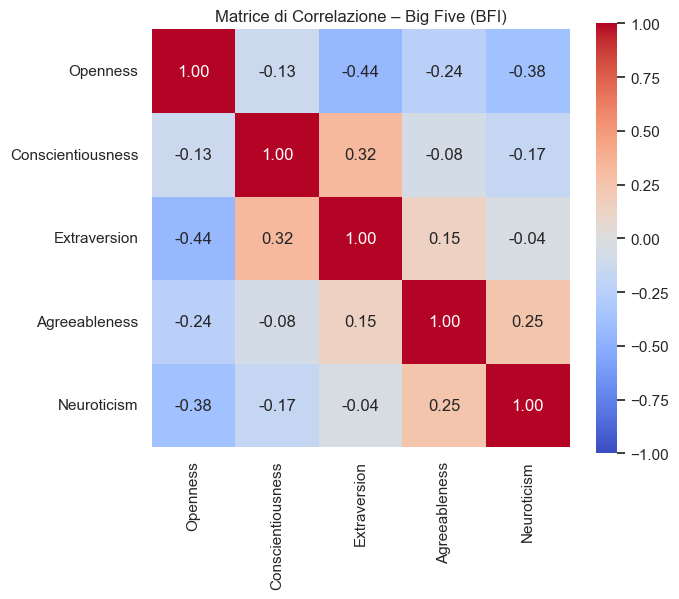

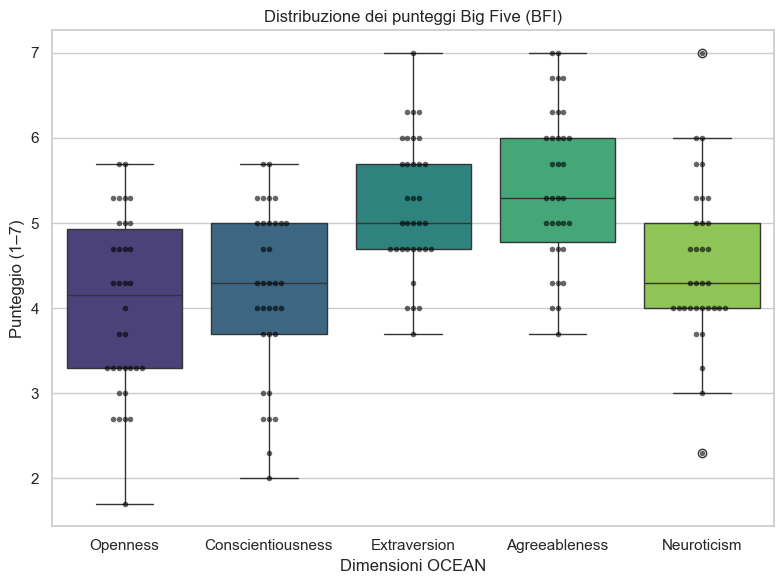

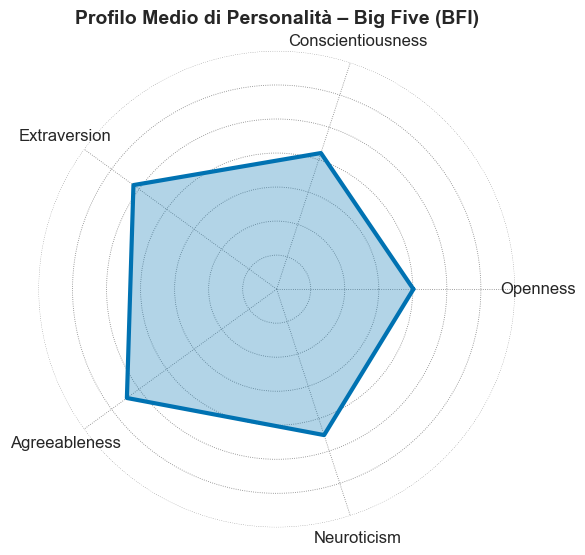

In [624]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Supponiamo che il tuo df sia:
# scores = pd.DataFrame([...])
bfi_cols = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]

# --- 1️⃣ Statistiche descrittive ---
desc = scores[bfi_cols].describe().T
desc["varianza"] = scores[bfi_cols].var()
print("📊 STATISTICHE DESCRITTIVE BFI (OCEAN):\n")
print(desc[["mean", "std", "min", "max", "varianza"]])

# --- 2️⃣ Test di normalità (Shapiro–Wilk) ---
print("\n📈 TEST DI NORMALITÀ (Shapiro–Wilk):")
for col in bfi_cols:
    stat, p = stats.shapiro(scores[col].dropna())
    print(f"{col}: W={stat:.3f}, p={p:.4f}", "→ Normale ✅" if p > 0.05 else "→ Non normale ⚠️")

# --- 3️⃣ Correlazioni ---
corr = scores[bfi_cols].corr(method='pearson')
print("\n🔗 MATRICE DI CORRELAZIONE (Pearson):")
print(corr.round(3))

# --- Heatmap delle correlazioni ---
plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1, square=True, fmt=".2f")
plt.title("Matrice di Correlazione – Big Five (BFI)")
plt.tight_layout()
plt.savefig("BFI_Correlazioni.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

# --- 4️⃣ Boxplot comparativi ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=scores[bfi_cols], palette="viridis")
sns.swarmplot(data=scores[bfi_cols], color='black', size=4, alpha=0.6)
plt.title("Distribuzione dei punteggi Big Five (BFI)")
plt.ylabel("Punteggio (1–7)")
plt.xlabel("Dimensioni OCEAN")
plt.tight_layout()
plt.savefig("BFI_Boxplot.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()

# --- 5️⃣ Radar plot media di gruppo ---
labels = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

mean_scores = scores[bfi_cols].mean().tolist()
mean_scores += mean_scores[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, mean_scores, color="#0072B2", linewidth=3)
ax.fill(angles, mean_scores, color="#0072B2", alpha=0.3)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12, fontweight="medium")
ax.set_yticklabels([])
ax.set_ylim(0, 7)
ax.spines["polar"].set_visible(False)
ax.grid(color="gray", linestyle=":", linewidth=0.6)
plt.title("Profilo Medio di Personalità – Big Five (BFI)", fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.savefig("BFI_Radar_Media.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


In [625]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. Comparative Boxplots ---
plt.figure(figsize=(9, 7))
# Boxplot with a clean 'viridis' palette
sns.boxplot(data=scores[bfi_cols], palette="viridis", width=0.6)
# Overlay individual data points (Swarmplot) for a complete distribution view
sns.swarmplot(data=scores[bfi_cols], color='black', size=3, alpha=0.5)

plt.title("Distribution of Big Five (BFI) Scores", fontsize=16, fontweight='bold')
plt.ylabel("Score (1–7)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) # Added horizontal gridlines
plt.tight_layout()

boxplot_filename = "BFI_Comparative_Boxplot.png"
plt.savefig(boxplot_filename, dpi=300, bbox_inches="tight", facecolor="white")
plt.close()


# --- 3. Mean Group Radar Plot ---
labels = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
num_vars = len(labels)

# Calculate angles for the radar chart
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Close the circle

# Calculate mean scores and close the circle
mean_scores = scores[bfi_cols].mean().tolist()
mean_scores += mean_scores[:1]

# Plotting setup
fig, ax = plt.subplots(figsize=(7, 7), subplot_kw=dict(polar=True))

# Plot color: A strong, professional blue
plot_color = "#1F78B4"

# Draw the line and add markers
ax.plot(angles, mean_scores, color=plot_color, linewidth=4, marker='o', markersize=8, label="Group Mean")
# Fill the area under the line
ax.fill(angles, mean_scores, color=plot_color, alpha=0.25)

# Set up the axes
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=13, fontweight="bold")
ax.set_yticklabels([]) # Hide y-labels
ax.set_ylim(1, 7) # Set the y-limit from 1 to 7 (the full scale)

# Aesthetics and Grid
ax.spines["polar"].set_visible(False)
ax.grid(color="gray", linestyle="-", linewidth=0.7, alpha=0.6)

plt.tight_layout()

radar_filename = "BFI_Mean_Radar_Plot.png"
plt.savefig(radar_filename, dpi=300, bbox_inches="tight", facecolor="white")
plt.close()

In [626]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Assicurati di importare pandas se non lo hai già fatto

# --- Funzione per generare i radar plot ---
def plotta_OCEAN(df, output_img="ocean_radar.png"):
    """
    Prende un DataFrame con colonne OCEAN e Q36 (ID partecipante),
    e genera radar plot con media gruppo + singoli partecipanti.
    """
    bfi_cols = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
    df_bfi = df[bfi_cols].copy()
    if "Q36" in df.columns:
        df_bfi.index = df["Q36"]

    # Media del gruppo
    df_mean = df_bfi.mean(axis=0)

    # Setup radar plot
    labels = ["O", "C", "E", "A", "N"]
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # SCELTA DELLA MAPPA DI COLORI HSV E GESTIONE DEL NUMERO DI COLORI
    colors_cmap = plt.colormaps.get_cmap("hsv") 
    
    # Questo è un valore arbitrario di quanti "salti" faremo nella mappa HSV
    # Possiamo calcolarlo in base al numero di partecipanti effettivi
    num_participants = len(df_bfi.index)
    
    # Genera un array di colori che sono ben distanziati lungo la mappa HSV
    # Si assicura che ci sia uno stacco visivo.
    # L'argomento `np.linspace(0, 1, num_participants, endpoint=False)` 
    # crea `num_participants` punti equidistanti tra 0 e 1, 
    # che vengono poi usati come input per la mappa `hsv`.
    # Questo darà colori distinti e distribuiti uniformemente lungo lo spettro.
    participant_colors = [colors_cmap(x) for x in np.linspace(0, 1, num_participants, endpoint=False)]


    rows, cols = 5, 7
    fig_width, fig_height = 16, 9
    fig, axes = plt.subplots(rows, cols, figsize=(fig_width, fig_height), subplot_kw=dict(polar=True))
    fig.suptitle("Profili di Personalità (OCEAN)", fontsize=24, y=1.03)
    axes = axes.flatten()

    # Plot dei partecipanti
    for i, participant in enumerate(df_bfi.index):
        if i >= len(axes):
            break
        ax = axes[i]

        # Media gruppo
        values_mean = df_mean.tolist() + [df_mean.tolist()[0]]
        ax.plot(angles, values_mean, color="gray", linestyle="dashed", linewidth=2, label="Media gruppo")
        ax.fill(angles, values_mean, color="gray", alpha=0.1)

        # Partecipante - USA IL COLORE PRE-GENERATO
        values_p = df_bfi.loc[participant].tolist() + [df_bfi.loc[participant].tolist()[0]]
        ax.plot(angles, values_p, color=participant_colors[i], linewidth=2) # <--- CAMBIAMENTO QUI
        ax.fill(angles, values_p, color=participant_colors[i], alpha=0.4) # <--- CAMBIAMENTO QUI

        # Stile
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(labels, fontsize=12)
        ax.set_ylim(0, 7)
        ax.set_title(f"{participant}", size=14, pad=25)

    # Nascondi subplot vuoti
    for j in range(len(df_bfi.index), len(axes)):
        fig.delaxes(axes[j])

    # Legenda
    handles, labels_leg = ax.get_legend_handles_labels()
    fig.legend(handles, labels_leg, loc="lower center", ncol=2, bbox_to_anchor=(0.5, -0.02), fontsize="large")

    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    fig.savefig(output_img, dpi=150, bbox_inches="tight")
    plt.close(fig)

    print(f"✅ Radar plot salvato in {output_img}")

In [627]:
def plotta_OCEAN_individuale(df, participant_id, output_img="ocean_radar_individuale.png"):
    """
    Mostra un singolo radar plot con confronto tra media gruppo e partecipante scelto.
    """
    bfi_cols = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
    df_bfi = df[bfi_cols].copy()
    if "Q36" in df.columns:
        df_bfi.index = df["Q36"]

    df_mean = df_bfi.mean(axis=0)
    labels = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Valori
    mean_vals = df_mean.tolist() + [df_mean.tolist()[0]]
    part_vals = df_bfi.loc[participant_id].tolist() + [df_bfi.loc[participant_id].tolist()[0]]

    # Plot elegante
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, mean_vals, color="gray", linestyle="dashed", linewidth=2, label="Media gruppo")
    ax.fill(angles, mean_vals, color="gray", alpha=0.1)

    ax.plot(angles, part_vals, color="#0072B2", linewidth=3, label=f"Partecipante {participant_id}")
    ax.fill(angles, part_vals, color="#0072B2", alpha=0.3)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12, fontweight="medium")
    ax.set_yticklabels([])
    ax.set_ylim(0, 7)
    ax.spines["polar"].set_visible(False)
    ax.grid(color="gray", linestyle=":", linewidth=0.6)
    ax.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), fontsize=11)
    fig.suptitle(f"Profilo OCEAN – Partecipante {participant_id}", fontsize=18, fontweight="bold", y=1.08)
    fig.patch.set_facecolor("white")
    fig.savefig(output_img, dpi=300, bbox_inches="tight", facecolor="white")
    plt.close(fig)
    print(f"✅ Figura individuale salvata in {output_img}")


In [628]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plotta_OCEAN_center_legend(df, output_img="ocean_radar_center_legend.png"):
    """
    Crea radar plot OCEAN per ciascun partecipante (puliti, senza testo)
    e inserisce al centro un plot con la media del gruppo + etichette OCEAN.
    """
    # --- Dati ---
    bfi_cols = ["Openness", "Conscientiousness", "Extraversion", "Agreeableness", "Neuroticism"]
    df_bfi = df[bfi_cols].copy()
    if "Q36" in df.columns:
        df_bfi.index = df["Q36"]

    df_mean = df_bfi.mean(axis=0)

    # --- Radar setup ---
    labels = ["O", "C", "E", "A", "N"]
    num_vars = len(labels)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    colors_cmap = plt.colormaps.get_cmap("hsv")
    num_participants = len(df_bfi.index)
    participant_colors = [colors_cmap(x) for x in np.linspace(0, 1, num_participants, endpoint=False)]

    # --- Figure setup (griglia con uno spazio centrale libero) ---
    rows, cols = 5, 7
    fig, axes = plt.subplots(rows, cols, figsize=(16, 9), subplot_kw=dict(polar=True))
    axes = axes.flatten()

    # Trova l’indice del centro nella griglia (posizione centrale approssimata)
    center_index = (rows * cols) // 2

    # --- Plot partecipanti ---
    for i, participant in enumerate(df_bfi.index):
        if i >= len(axes):
            break
        # Salta la cella centrale (riservata alla legenda)
        ax_index = i if i < center_index else i + 1
        if ax_index >= len(axes):
            break
        ax = axes[ax_index]

        # Media gruppo (linea grigia tratteggiata)
        values_mean = df_mean.tolist() + [df_mean.tolist()[0]]
        ax.plot(angles, values_mean, color="gray", linestyle="dashed", linewidth=2)
        ax.fill(angles, values_mean, color="gray", alpha=0.1)

        # Partecipante
        values_p = df_bfi.loc[participant].tolist() + [df_bfi.loc[participant].tolist()[0]]
        ax.plot(angles, values_p, color=participant_colors[i], linewidth=2)
        ax.fill(angles, values_p, color=participant_colors[i], alpha=0.4)

        # Stile pulito
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels([])
        ax.set_yticks(np.linspace(0, 7, 8))
        ax.set_yticklabels([])
        ax.set_ylim(0, 7)
        ax.grid(True, color="lightgray", linestyle="solid", alpha=0.6)
        ax.spines['polar'].set_visible(False)

    # --- Plot centrale (legenda / media gruppo) ---
    legend_ax = axes[center_index]
    values_mean = df_mean.tolist() + [df_mean.tolist()[0]]
    legend_ax.plot(angles, values_mean, color="gray", linewidth=3)
    legend_ax.fill(angles, values_mean, color="gray", alpha=0.15)

    legend_ax.set_xticks(angles[:-1])
    legend_ax.set_xticklabels(labels, fontsize=13, fontweight="bold")
    legend_ax.set_yticks(np.linspace(0, 7, 8))
    legend_ax.set_yticklabels([])
    legend_ax.set_ylim(0, 7)
    legend_ax.grid(True, color="lightgray", linestyle="solid", alpha=0.7)
    legend_ax.spines['polar'].set_visible(False)

    fig.subplots_adjust(wspace=0.3, hspace=0.3)
    fig.savefig(output_img, dpi=300, bbox_inches="tight", facecolor="white")
    plt.close(fig)

    print(f"✅ Radar plot grid con legenda centrale salvato in {output_img}")


In [629]:
# Panoramica (appendice)
plotta_OCEAN_center_legend(scores)

✅ Radar plot grid con legenda centrale salvato in ocean_radar_center_legend.png


In [630]:
(scores)

,Q36,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,201,3.3,2.7,4.7,5.0,4.7
1,202,2.7,4.0,6.0,6.0,5.0
2,203,4.3,4.3,5.0,5.0,3.7
3,204,4.0,5.0,6.0,6.7,3.7
4,205,2.7,5.0,6.0,5.0,5.3
5,206,3.0,4.3,6.3,6.3,5.3
6,207,5.7,3.0,4.7,4.0,4.0
7,208,5.0,5.3,5.0,3.7,4.0
8,209,1.7,5.3,5.7,4.7,3.0
9,210,5.3,5.3,4.3,5.3,4.0


In [631]:
# --- MAPPATURA TESTO → NUMERI ---
text_to_num_map = {
    'Very slightly or not at all': 1,
    'A little': 2,
    'Moderately': 3,
    'Quite a bit': 4,
    'Extremely': 5
}

# --- SELEZIONE COLONNE PANAS PRE (Q33) ---
panas_pre_cols = [col for col in merged_df.columns if col.startswith('Q33_')]

# --- CONVERSIONE DEI TESTI IN NUMERI ---
for col in panas_pre_cols:
    merged_df[col] = merged_df[col].replace(text_to_num_map)

# --- CONTROLLO DELLA CONVERSIONE ---
print("Esempio dopo la mappatura (Q33_1):")
print(merged_df['Q33_1'].value_counts(dropna=False))

# --- DEFINIZIONE ITEM PANAS ---
pa_items = ['1', '3', '5', '9', '10', '12', '14', '16', '17', '19']  # Affetto Positivo
na_items = ['2', '4', '6', '7', '8', '11', '13', '15', '18', '20']  # Affetto Negativo

# --- CALCOLO AFFETTO POSITIVO (PA PRE) ---
pa_pre_cols = ['Q33_' + item for item in pa_items]
merged_df['PA_Pre'] = merged_df[pa_pre_cols].sum(axis=1)

# --- CALCOLO AFFETTO NEGATIVO (NA PRE) ---
na_pre_cols = ['Q33_' + item for item in na_items]
merged_df['NA_Pre'] = merged_df[na_pre_cols].sum(axis=1)

print("\n✅ Calcolo dei punteggi PANAS PRE completato. Range atteso: 10–50.")
print(merged_df[['PA_Pre', 'NA_Pre']].head())


Esempio dopo la mappatura (Q33_1):
Q33_1
4    19
5     8
3     7
Name: count, dtype: int64

✅ Calcolo dei punteggi PANAS PRE completato. Range atteso: 10–50.
   PA_Pre  NA_Pre
0      29      14
1      43      22
2      33      31
3      34      19
4      32      17


C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\578589135.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[col] = merged_df[col].replace(text_to_num_map)


📋 STATISTICHE DESCRITTIVE PANAS PRE:

             mean       std   min   max   varianza
PA_Pre  32.794118  4.829075  23.0  43.0  23.319964
NA_Pre  23.617647  5.810204  12.0  34.0  33.758467

📈 TEST DI NORMALITÀ (Shapiro–Wilk):
PA_Pre: statistic=0.959, p-value=0.2340
 → Distribuzione compatibile con la normalità
NA_Pre: statistic=0.967, p-value=0.3944
 → Distribuzione compatibile con la normalità

🔗 CORRELAZIONE tra PA_Pre e NA_Pre: r = -0.172, p = 0.3294


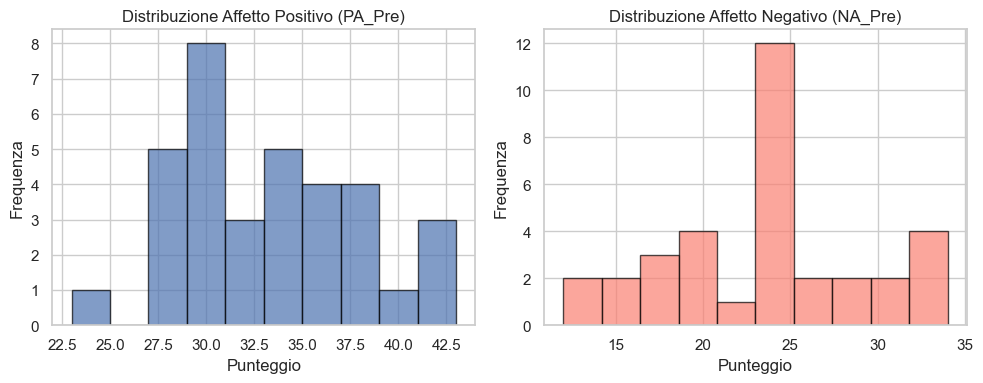

In [632]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# --- Analisi descrittiva PANAS PRE ---
desc_stats = merged_df[['PA_Pre', 'NA_Pre']].describe().T
desc_stats['varianza'] = merged_df[['PA_Pre', 'NA_Pre']].var().values
print("📋 STATISTICHE DESCRITTIVE PANAS PRE:\n")
print(desc_stats[['mean', 'std', 'min', 'max', 'varianza']])

# --- Test di normalità (Shapiro-Wilk) ---
print("\n📈 TEST DI NORMALITÀ (Shapiro–Wilk):")
for col in ['PA_Pre', 'NA_Pre']:
    stat, p = stats.shapiro(merged_df[col].dropna())
    print(f"{col}: statistic={stat:.3f}, p-value={p:.4f}")
    if p < 0.05:
        print(" → Non normale (p < .05)")
    else:
        print(" → Distribuzione compatibile con la normalità")

# --- Correlazione PA–NA ---
r, p_corr = stats.pearsonr(merged_df['PA_Pre'], merged_df['NA_Pre'])
print(f"\n🔗 CORRELAZIONE tra PA_Pre e NA_Pre: r = {r:.3f}, p = {p_corr:.4f}")

# --- Grafici ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()

# Istogramma PA_Pre
axes[0].hist(merged_df['PA_Pre'], bins=10, edgecolor='black', alpha=0.7)
axes[0].set_title("Distribuzione Affetto Positivo (PA_Pre)")
axes[0].set_xlabel("Punteggio")
axes[0].set_ylabel("Frequenza")

# Istogramma NA_Pre
axes[1].hist(merged_df['NA_Pre'], bins=10, edgecolor='black', alpha=0.7, color='salmon')
axes[1].set_title("Distribuzione Affetto Negativo (NA_Pre)")
axes[1].set_xlabel("Punteggio")
axes[1].set_ylabel("Frequenza")

plt.tight_layout()
plt.show()


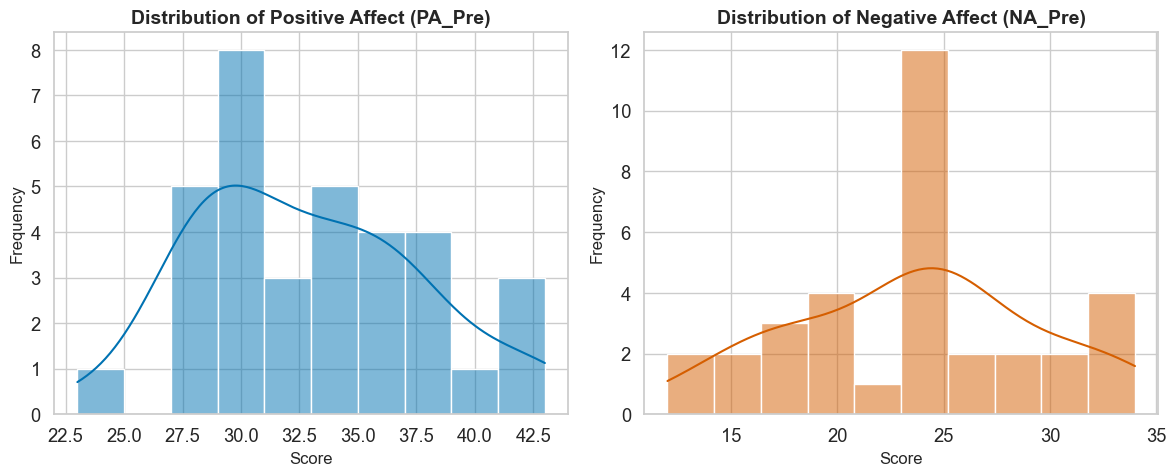

C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\2606961383.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tipo', y='Punteggio', data=data_melted, palette=['#0072B2', '#D55E00'])


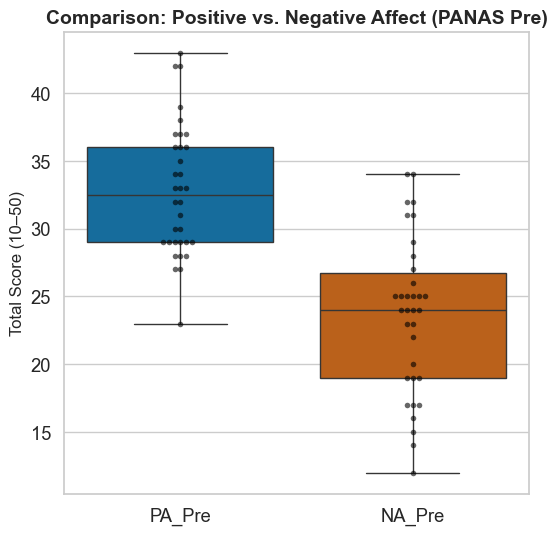

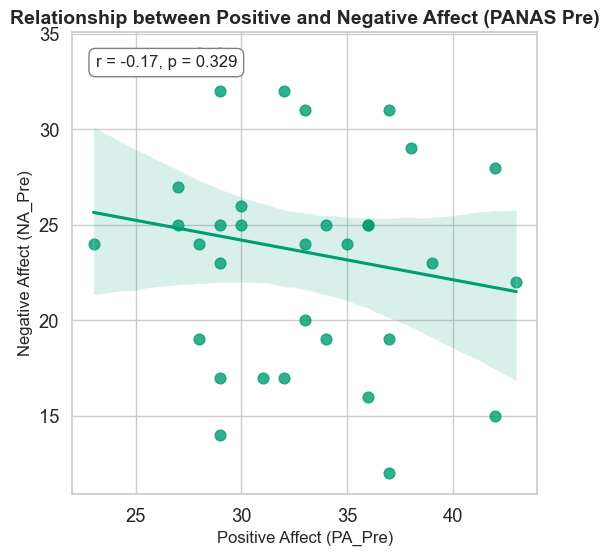

In [633]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Impostazioni estetiche generali
plt.style.use("default")
sns.set_theme(style="whitegrid", font_scale=1.2)

# === 1️⃣ Distribuzione dei punteggi ===
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(merged_df['PA_Pre'], kde=True, color="#0072B2", ax=axes[0], bins=10)
axes[0].set_title("Distribution of Positive Affect (PA_Pre)", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Score", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

sns.histplot(merged_df['NA_Pre'], kde=True, color="#D55E00", ax=axes[1], bins=10)
axes[1].set_title("Distribution of Negative Affect (NA_Pre)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Score", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.savefig("PANAS_Pre_Distribuzioni.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


# === 2️⃣ Boxplot comparativo ===
plt.figure(figsize=(6, 6))
data_melted = merged_df.melt(value_vars=['PA_Pre', 'NA_Pre'], var_name='Tipo', value_name='Punteggio')
sns.boxplot(x='Tipo', y='Punteggio', data=data_melted, palette=['#0072B2', '#D55E00'])
sns.swarmplot(x='Tipo', y='Punteggio', data=data_melted, color='black', alpha=0.6, size=4)
plt.title("Comparison: Positive vs. Negative Affect (PANAS Pre)", fontsize=14, fontweight='bold')
plt.xlabel("")
plt.ylabel("Total Score (10–50)", fontsize=12)
plt.savefig("PANAS_Pre_Boxplot.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


# === 3️⃣ Scatter plot con regressione lineare ===
plt.figure(figsize=(6, 6))
sns.regplot(x='PA_Pre', y='NA_Pre', data=merged_df, color="#009E73", ci=95, scatter_kws={"s":60, "alpha":0.8})
plt.title("Relationship between Positive and Negative Affect (PANAS Pre)", fontsize=14, fontweight='bold')
plt.xlabel("Positive Affect (PA_Pre)", fontsize=12)
plt.ylabel("Negative Affect (NA_Pre)", fontsize=12)

# Calcolo r e p per annotazione
r, p_corr = stats.pearsonr(merged_df['PA_Pre'], merged_df['NA_Pre'])
plt.text(
    0.05, 0.95,
    f"r = {r:.2f}, p = {p_corr:.3f}",
    transform=plt.gca().transAxes,
    ha='left', va='top',
    fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.4')
)

plt.savefig("PANAS_Pre_Scatter.png", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


In [634]:
# Assumendo che il tuo DataFrame si chiami 'merged_df'

# 1. Definisci la mappatura dal testo ai numeri (adatta i testi se necessario!)
# Adatta queste chiavi (le risposte testuali) in base al tuo questionario.
# Ho usato esempi comuni, ma POTREBBERO ESSERE DIVERSI nel tuo merged_df.
text_to_num_map = {
    'Very slightly or not at all': 1,
    'A little': 2,
    'Moderately': 3,
    'Quite a bit': 4,
    'Extremely': 5
}

# Identifica tutte le colonne del PANAS (Q33 e Q12)
panas_cols = [col for col in merged_df.columns if col.startswith('Q33_') or col.startswith('Q12_')]

# Applica la mappatura a tutte le colonne PANAS
for col in panas_cols:
    # 'errors=\'coerce\'' trasformerà qualsiasi valore non trovato in NaN
    merged_df[col] = merged_df[col].replace(text_to_num_map)
    # Se i valori sono ancora stringhe dopo il replace (e.g., se ci sono spazi extra),
    # prova a usare .str.strip() prima del replace
    # merged_df[col] = merged_df[col].astype(str).str.strip().replace(text_to_num_map)

# !!! CONTROLLO CRITICO: Verificare che la conversione sia andata a buon fine
# Se questa riga mostra ancora dei valori testuali o molti NaN, la tua mappatura (text_to_num_map)
# non corrisponde esattamente ai valori nel tuo DataFrame.
print("Esempio dopo la mappatura (Q33_1):")
print(merged_df['Q33_1'].value_counts(dropna=False))

Esempio dopo la mappatura (Q33_1):
Q33_1
4    19
5     8
3     7
Name: count, dtype: int64


C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\2139646306.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  merged_df[col] = merged_df[col].replace(text_to_num_map)


In [635]:
# 2. Definisci gli item per l'Affetto Positivo (PA) e l'Affetto Negativo (NA)
pa_items = ['1', '3', '5', '9', '10', '12', '14', '16', '17', '19']
na_items = ['2', '4', '6', '7', '8', '11', '13', '15', '18', '20']

# --- CALCOLO AFFETTO POSITIVO (PA) ---
pa_pre_cols = ['Q33_' + item for item in pa_items]
merged_df['PA_Pre'] = merged_df[pa_pre_cols].sum(axis=1)

pa_post_cols = ['Q12_' + item for item in pa_items]
merged_df['PA_Post'] = merged_df[pa_post_cols].sum(axis=1)

# --- CALCOLO AFFETTO NEGATIVO (NA) ---
na_pre_cols = ['Q33_' + item for item in na_items]
merged_df['NA_Pre'] = merged_df[na_pre_cols].sum(axis=1)

na_post_cols = ['Q12_' + item for item in na_items]
merged_df['NA_Post'] = merged_df[na_post_cols].sum(axis=1)

print("\nCalcolo dei punteggi completato. Range atteso: 10-50.")


Calcolo dei punteggi completato. Range atteso: 10-50.


In [636]:
from scipy.stats import pearsonr

# 3. Calcolo delle Correlazioni

# Correlazione Affetto Positivo (PA)
corr_pa, p_value_pa = pearsonr(merged_df['PA_Pre'], merged_df['PA_Post'])

print("\n--- Correlazione Affetto Positivo (PA) ---")
print(f"Coefficiente di Correlazione (r): {corr_pa:.3f}")
print(f"Valore p (p-value): {p_value_pa:.3f}")

# Correlazione Affetto Negativo (NA)
corr_na, p_value_na = pearsonr(merged_df['NA_Pre'], merged_df['NA_Post'])

print("\n--- Correlazione Affetto Negativo (NA) ---")
print(f"Coefficiente di Correlazione (r): {corr_na:.3f}")
print(f"Valore p (p-value): {p_value_na:.3f}")


--- Correlazione Affetto Positivo (PA) ---
Coefficiente di Correlazione (r): 0.478
Valore p (p-value): 0.004

--- Correlazione Affetto Negativo (NA) ---
Coefficiente di Correlazione (r): -0.051
Valore p (p-value): 0.775


C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\44140772.py:14: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data_for_plot = data_for_plot.stack(level=0).reset_index(names=['ID', 'Affect'])


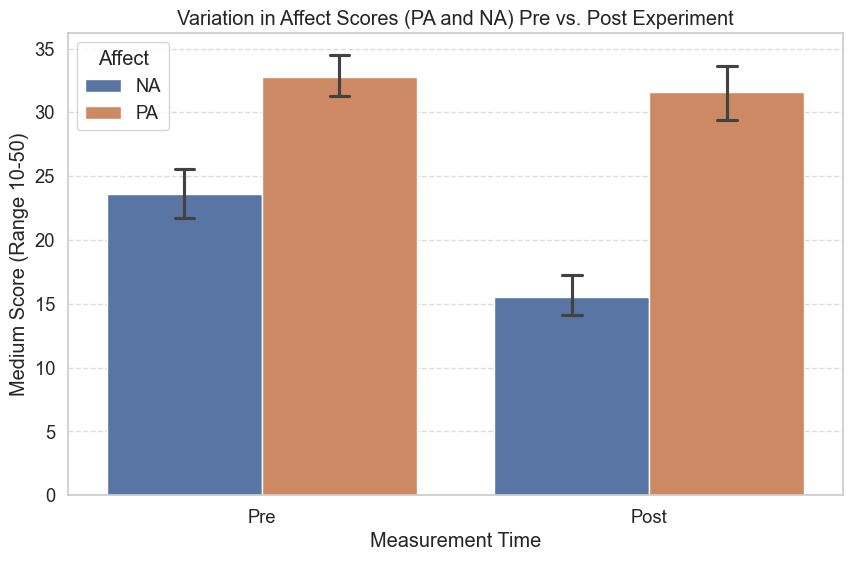

In [637]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- 1. PREPARAZIONE DEI DATI (Da Wide a Long Format) ---

# Creazione di un DataFrame 'long' solo con i punteggi di interesse
data_for_plot = merged_df[['PA_Pre', 'PA_Post', 'NA_Pre', 'NA_Post']]

# Rinomina per il melt
data_for_plot.columns = pd.MultiIndex.from_tuples([
    ('PA', 'Pre'), ('PA', 'Post'), ('NA', 'Pre'), ('NA', 'Post')
])
data_for_plot = data_for_plot.stack(level=0).reset_index(names=['ID', 'Affect'])

# Melt finale per combinare Pre e Post in un'unica colonna
data_long = data_for_plot.melt(
    id_vars=['ID', 'Affect'],
    value_vars=['Pre', 'Post'],
    var_name='Time',
    value_name='Score'
)

# --- 2. CREAZIONE DEL GRAFICO (Bar Plot con Intervallo di Confidenza) ---

plt.figure(figsize=(10, 6))

# Creazione del Bar Plot: 'Time' sull'asse X, 'Score' sull'asse Y, separati per 'Affect'
sns.barplot(
    x='Time',
    y='Score',
    hue='Affect',
    data=data_long,
    errorbar='ci',  # Visualizza l'Intervallo di Confidenza al 95%
    capsize=0.1     # Dimensione dei tappi sulle barre di errore
)

plt.title('Variation in Affect Scores (PA and NA) Pre vs. Post Experiment')
plt.xlabel('Measurement Time')
plt.ylabel('Medium Score (Range 10-50)')
plt.legend(title='Affect')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig("PA_NA_POST_PRE", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()



# --- 3. PROSSIMO PASSO: Test Statistico ---

# Dopo la visualizzazione, il passo cruciale è eseguire un Test t per Campioni Accoppiati
# (Paired Samples t-test) per confermare se le differenze visualizzate sono significative.

<Figure size 1200x600 with 0 Axes>

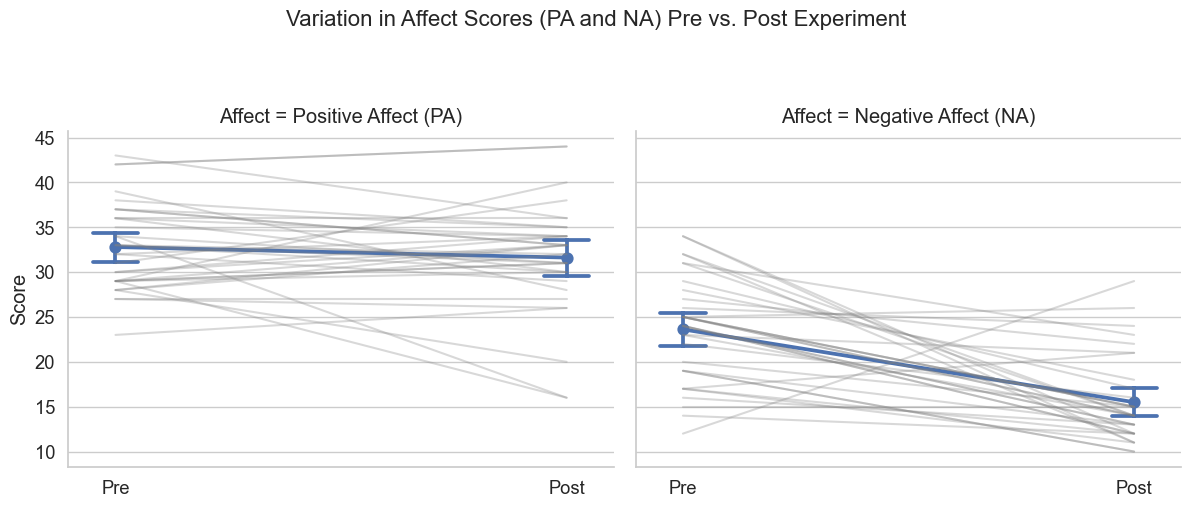

In [638]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# --- 1. PREPARAZIONE DEI DATI (Da Wide a Long Format per il Plot) ---

# Prende solo le colonne dei punteggi calcolati
data_for_plot = merged_df[['PA_Pre', 'PA_Post', 'NA_Pre', 'NA_Post']].copy()

# Aggiunge un ID univoco per ogni partecipante, necessario per tracciare le linee
data_for_plot['ID'] = data_for_plot.index 

# Rinomina e impila i dati per l'Affetto Positivo (PA)
pa_long = data_for_plot[['ID', 'PA_Pre', 'PA_Post']].melt(
    id_vars='ID', 
    var_name='Time', 
    value_name='Score'
)
pa_long['Affect'] = 'Positive Affect (PA)'
pa_long['Time'] = pa_long['Time'].replace({'PA_Pre': 'Pre', 'PA_Post': 'Post'})

# Rinomina e impila i dati per l'Affetto Negativo (NA)
na_long = data_for_plot[['ID', 'NA_Pre', 'NA_Post']].melt(
    id_vars='ID', 
    var_name='Time', 
    value_name='Score'
)
na_long['Affect'] = 'Negative Affect (NA)'
na_long['Time'] = na_long['Time'].replace({'NA_Pre': 'Pre', 'NA_Post': 'Post'})

# Combina i due set di dati in un unico DataFrame 'long'
data_combined = pd.concat([pa_long, na_long])

# --- 2. CREAZIONE DEL PLOT ---

plt.figure(figsize=(12, 6))

# Dividi il grafico in due subplot: uno per PA e uno per NA
sns.catplot(
    data=data_combined,
    x='Time',
    y='Score',
    col='Affect',
    kind='point',  # Usa 'point' per mostrare la media e la barra di errore
    errorbar=('ci', 95), # Barra di errore come Intervallo di Confidenza al 95%
    capsize=0.1,
    height=5,
    aspect=1.2
)

# Aggiungi le linee individuali per mostrare la variazione accoppiata
for i, affect in enumerate(['Positive Affect (PA)', 'Negative Affect (NA)']):
    ax = plt.gcf().axes[i]
    # Filtra i dati per l'Affetto corrente
    subset = data_combined[data_combined['Affect'] == affect]
    
    # Disegna una linea per ogni ID (individuo)
    sns.lineplot(
        data=subset,
        x='Time',
        y='Score',
        units='ID',
        estimator=None, # Non calcolare la media, traccia linee individuali
        alpha=0.3,      # Rendi le linee individuali semi-trasparenti
        color='gray',
        ax=ax,
        legend=False
    )
    # Rimuovi l'etichetta dell'asse x del plot individuale per non sovrapporla
    ax.set_xlabel('') 

plt.suptitle('Variation in Affect Scores (PA and NA) Pre vs. Post Experiment', y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("PA_NA_POST_PRE_2", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()



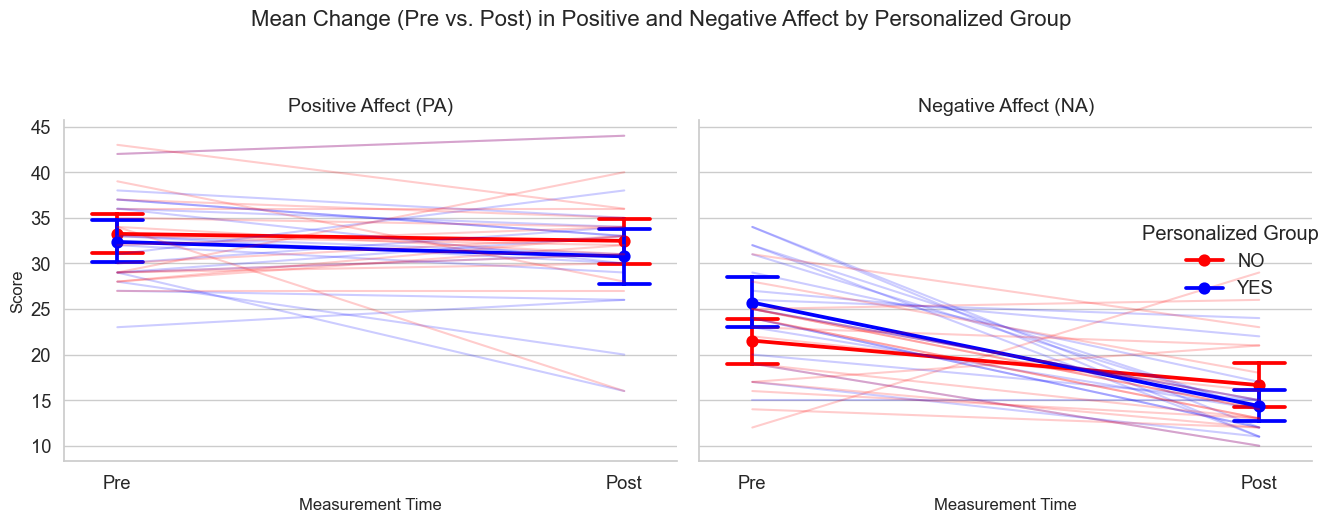

In [639]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# --- 1. DATA PREPARATION (Wide to Long Format for Plotting) ---

# Select score columns and the 'Personalizzato' column
data_for_plot = merged_df[['PA_Pre', 'PA_Post', 'NA_Pre', 'NA_Post', 'Personalizzato']].copy()

# Add a unique ID for each participant
data_for_plot['ID'] = data_for_plot.index 

# Reshape data for Positive Affect (PA)
pa_long = data_for_plot[['ID', 'Personalizzato', 'PA_Pre', 'PA_Post']].melt(
    id_vars=['ID', 'Personalizzato'], 
    var_name='Time', 
    value_name='Score'
)
pa_long['Affect'] = 'Positive Affect (PA)'
pa_long['Time'] = pa_long['Time'].replace({'PA_Pre': 'Pre', 'PA_Post': 'Post'})

# Reshape data for Negative Affect (NA)
na_long = data_for_plot[['ID', 'Personalizzato', 'NA_Pre', 'NA_Post']].melt(
    id_vars=['ID', 'Personalizzato'], 
    var_name='Time', 
    value_name='Score'
)
na_long['Affect'] = 'Negative Affect (NA)'
na_long['Time'] = na_long['Time'].replace({'NA_Pre': 'Pre', 'NA_Post': 'Post'})

# Combine the two datasets into one long-format DataFrame
data_combined = pd.concat([pa_long, na_long])

# --- 2. CREATE THE PLOTS ---

# Create the main figure with PA and NA side by side
g = sns.catplot(
    data=data_combined,
    x='Time',
    y='Score',
    col='Affect',         
    hue='Personalizzato', # still 'SI'/'NO' from your data
    kind='point', 
    errorbar=('ci', 95),
    capsize=0.1,
    height=5,
    aspect=1.2,
    palette={'SI': 'blue', 'NO': 'red'} # colors consistent with your data
)

# --- 3. ADD INDIVIDUAL LINES (for paired visualization) ---

for affect, ax in g.axes_dict.items():
    # Lines for group 'SI'
    subset_si = data_combined[(data_combined['Affect'] == affect) & (data_combined['Personalizzato'] == 'SI')]
    sns.lineplot(
        data=subset_si,
        x='Time',
        y='Score',
        units='ID',
        estimator=None,
        alpha=0.2,
        color='blue',
        ax=ax,
        legend=False
    )
    
    # Lines for group 'NO'
    subset_no = data_combined[(data_combined['Affect'] == affect) & (data_combined['Personalizzato'] == 'NO')]
    sns.lineplot(
        data=subset_no,
        x='Time',
        y='Score',
        units='ID',
        estimator=None,
        alpha=0.2,
        color='red',
        ax=ax,
        legend=False
    )
    
    ax.set_xlabel('Measurement Time', fontsize=12)
    ax.set_ylabel('Score', fontsize=12)
    ax.set_title(affect, fontsize=14)

# --- 4. FINAL TITLES AND LAYOUT ---
g.fig.suptitle('Mean Change (Pre vs. Post) in Positive and Negative Affect by Personalized Group', 
               y=1.05, fontsize=16)
g._legend.set_title('Personalized Group')  # change legend title to English

# Optional: rename legend labels (SI → YES, NO → NO)
new_labels = ['YES' if t.get_text() == 'SI' else 'NO' for t in g._legend.texts]
for text_obj, new_label in zip(g._legend.texts, new_labels):
    text_obj.set_text(new_label)

plt.tight_layout()
plt.savefig("PA_NA_POST_PRE_PERS", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()




In [640]:
# --- 3. TEST T PER CAMPIONI ACCOPPIATI (Paired Samples t-test) ---

print("\n--- Risultati del Test t per Campioni Accoppiati ---")

# a) Test t per Affetto Positivo (PA)
t_pa, p_pa = stats.ttest_rel(merged_df['PA_Pre'], merged_df['PA_Post'])

# b) Test t per Affetto Negativo (NA)
t_na, p_na = stats.ttest_rel(merged_df['NA_Pre'], merged_df['NA_Post'])

print("\nAffetto Positivo (PA):")
print(f"  Media PA_Pre: {merged_df['PA_Pre'].mean():.2f}")
print(f"  Media PA_Post: {merged_df['PA_Post'].mean():.2f}")
print(f"  T-statistic (t): {t_pa:.3f}")
print(f"  Valore p (p-value): {p_pa:.3f}")

print("\nAffetto Negativo (NA):")
print(f"  Media NA_Pre: {merged_df['NA_Pre'].mean():.2f}")
print(f"  Media NA_Post: {merged_df['NA_Post'].mean():.2f}")
print(f"  T-statistic (t): {t_na:.5f}")
print(f"  Valore p (p-value): {p_na:.6f}")


--- Risultati del Test t per Campioni Accoppiati ---

Affetto Positivo (PA):
  Media PA_Pre: 32.79
  Media PA_Post: 31.62
  T-statistic (t): 1.199
  Valore p (p-value): 0.239

Affetto Negativo (NA):
  Media NA_Pre: 23.62
  Media NA_Post: 15.50
  T-statistic (t): 6.14258
  Valore p (p-value): 0.000001


In [641]:
import pandas as pd

# Assumendo che il tuo DataFrame si chiami 'merged_df' e contenga 'NA_Pre' e 'NA_Post'

# Calcola il punteggio di differenza (Variazione)
merged_df['NA_Difference'] = merged_df['NA_Post'] - merged_df['NA_Pre']

print("Prime 5 righe del DataFrame con la variazione NA:")
print(merged_df[['NA_Pre', 'NA_Post', 'NA_Difference']])

Prime 5 righe del DataFrame con la variazione NA:
    NA_Pre  NA_Post  NA_Difference
0       14       12             -2
1       22       16             -6
2       31       23             -8
3       19       13             -6
4       17       12             -5
5       25       15            -10
6       25       14            -11
7       25       26              1
8       23       21             -2
9       25       14            -11
10      25       15            -10
11      32       11            -21
12      34       12            -22
13      34       11            -23
14      29       17            -12
15      19       10             -9
16      31       14            -17
17      26       24             -2
18      17       11             -6
19      24       12            -12
20      27       22             -5
21      25       15            -10
22      24       12            -12
23      15       15              0
24      12       29             17
25      17       21              4
26   

In [642]:
# Ordina il DataFrame in base alla colonna 'NA_Difference' in ordine decrescente
# (i valori positivi più grandi, che indicano il maggior aumento, saranno in cima)
merged_df_sorted = merged_df.sort_values(by='NA_Difference', ascending=False)

# Prende il partecipante che ha avuto l'aumento più significativo
outlier_increase = merged_df_sorted.iloc[0]

id_outlier = outlier_increase.name

# --- Risultato ---
print("\n--- Partecipante con il Maggiore Aumento di Affetto Negativo (NA) ---")
print(f"ID Partecipante (Indice del DataFrame): {outlier_increase.name}")
print(f"NA Pre-Esperimento: {outlier_increase['NA_Pre']}")
print(f"NA Post-Esperimento: {outlier_increase['NA_Post']}")
print(f"Variazione Totale (Post - Pre): {outlier_increase['NA_Difference']}")

# Se l'indice non è significativo, puoi provare a trovare una colonna 'ID_Partecipante'
# che identifichi meglio il soggetto se presente nel tuo merged_df:
# print(f"ID Partecipante (colonna specifica): {outlier_increase['ID_Partecipante']}")


--- Partecipante con il Maggiore Aumento di Affetto Negativo (NA) ---
ID Partecipante (Indice del DataFrame): 24
NA Pre-Esperimento: 12
NA Post-Esperimento: 29
Variazione Totale (Post - Pre): 17


In [643]:
merged_df.iloc[id_outlier]["Q36"] # A LOLLOOOOOOOOOOO 

'225'

In [644]:
len(merged_df)

34

In [645]:
import pandas as pd
from scipy import stats

# Assumendo che il tuo DataFrame si chiami 'merged_df'

# Calcola le colonne di Variazione (Delta) se non sono già presenti
# Un valore positivo significa aumento, un valore negativo significa diminuzione
if 'PA_Difference' not in merged_df.columns:
    merged_df['PA_Difference'] = merged_df['PA_Post'] - merged_df['PA_Pre']

if 'NA_Difference' not in merged_df.columns:
    merged_df['NA_Difference'] = merged_df['NA_Post'] - merged_df['NA_Pre']

# Suddividi i dati in base al gruppo "Personalizzato"
gruppo_si = merged_df[merged_df['Personalizzato'] == 'SI']
gruppo_no = merged_df[merged_df['Personalizzato'] == 'NO']

print(f"Dimensione Gruppo 'SI': {len(gruppo_si)} | Dimensione Gruppo 'NO': {len(gruppo_no)}")

Dimensione Gruppo 'SI': 17 | Dimensione Gruppo 'NO': 17


In [646]:
t_pa_diff, p_pa_diff = stats.ttest_ind(gruppo_si['PA_Difference'], gruppo_no['PA_Difference'], equal_var=True)

print("\n--- Confronto Variazione Affetto Positivo (Delta PA) ---")
print(f"Media Delta PA ('SI' Personalizzato): {gruppo_si['PA_Difference'].mean():.2f}")
print(f"Media Delta PA ('NO' Controllo): {gruppo_no['PA_Difference'].mean():.2f}")
print(f"T-statistic (t): {t_pa_diff:.3f}")
print(f"Valore p (p-value): {p_pa_diff:.3f}")


--- Confronto Variazione Affetto Positivo (Delta PA) ---
Media Delta PA ('SI' Personalizzato): -1.59
Media Delta PA ('NO' Controllo): -0.76
T-statistic (t): -0.414
Valore p (p-value): 0.681


In [647]:
t_na_diff, p_na_diff = stats.ttest_ind(gruppo_si['NA_Difference'], gruppo_no['NA_Difference'], equal_var=True)

mean_diff_SI = gruppo_si['NA_Difference'].mean()
mean_diff_NO = gruppo_no['NA_Difference'].mean()

print("\n--- Confronto Variazione Affetto Negativo (Delta NA) ---")
print(f"Media Delta NA ('SI' Personalizzato): {gruppo_si['NA_Difference'].mean():.2f}")
print(f"Media Delta NA ('NO' Controllo): {gruppo_no['NA_Difference'].mean():.2f}")
print(f"T-statistic (t): {t_na_diff:.3f}")
print(f"Valore p (p-value): {p_na_diff:.3f}")


--- Confronto Variazione Affetto Negativo (Delta NA) ---
Media Delta NA ('SI' Personalizzato): -11.35
Media Delta NA ('NO' Controllo): -4.88
T-statistic (t): -2.665
Valore p (p-value): 0.012


In [648]:
import numpy as np
import pandas as pd
from scipy import stats

# --- 1. DATI DEI GRUPPI (Basati sui tuoi risultati e N=23) ---

# Assunzione sulla dimensione dei sottogruppi (da confermare con i tuoi dati reali)
N_SI = len(merged_df[merged_df['Personalizzato'] == 'SI'])
N_NO = len(merged_df[merged_df['Personalizzato'] == 'NO'])

# --- 2. CALCOLO DELLA D DI COHEN (Formule basate su t-stat) ---

# Calcola la d di Cohen: misura l'Effect Size
# Formula: d = t * sqrt((N1 + N2) / (N1 * N2))
d_cohen = t_na_diff * np.sqrt((N_SI + N_NO) / (N_SI * N_NO))

# --- 3. RISULTATI ---

print("--- Analisi dell'Effect Size (Influenza della Personalizzazione) ---")
print(f"Dimensione Gruppo SI (Personalizzato): N={N_SI}")
print(f"Dimensione Gruppo NO (Controllo): N={N_NO}")
print("-" * 50)
print(f"La Media della Variazione (riduzione) di NA per SI è stata di: {mean_diff_SI:.2f}")
print(f"La Media della Variazione (riduzione) di NA per NO è stata di: {mean_diff_NO:.2f}")
print(f"La differenza tra i due gruppi è di: {mean_diff_SI - mean_diff_NO:.2f} punti.")
print("-" * 50)
print(f"d di Cohen (Effect Size): {d_cohen:.3f}")

# Interpretazione dell'Effect Size (Standard)
if abs(d_cohen) >= 0.8:
    interpretazione = "MOLTO GRANDE (Strong)"
elif abs(d_cohen) >= 0.5:
    interpretazione = "Medio (Moderate)"
elif abs(d_cohen) >= 0.2:
    interpretazione = "Piccolo (Small)"
else:
    interpretazione = "Trascurabile (Negligible)"

print(f"Interpretazione dell'Effect Size: {interpretazione}")

--- Analisi dell'Effect Size (Influenza della Personalizzazione) ---
Dimensione Gruppo SI (Personalizzato): N=17
Dimensione Gruppo NO (Controllo): N=17
--------------------------------------------------
La Media della Variazione (riduzione) di NA per SI è stata di: -11.35
La Media della Variazione (riduzione) di NA per NO è stata di: -4.88
La differenza tra i due gruppi è di: -6.47 punti.
--------------------------------------------------
d di Cohen (Effect Size): -0.914
Interpretazione dell'Effect Size: MOLTO GRANDE (Strong)


In [649]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

# --- 1. MAPPATURA E CALCOLO DEL PUNTEGGIO DI SOLITUDINE (COME DA TUA RICHIESTA) ---
likert_mapping = {
    'Never': 1,
    'Once in a while': 2,
    'Fairly often': 3,
    'Very often': 4
}

# Applica la mappatura alle colonne della solitudine
for col in ["Q34_1", "Q34_2", "Q34_3"]:
    merged_df[col + '_Numeric'] = merged_df[col].map(likert_mapping)
    
# Calcola il punteggio totale di solitudine pre-intervento (range 3-12)
merged_df['Loneliness_Pre'] = merged_df['Q34_1_Numeric'] + merged_df['Q34_2_Numeric'] + merged_df['Q34_3_Numeric']

# Analisi Statistica Descrittiva
cols_to_analyze = ['Q34_1_Numeric', 'Q34_2_Numeric', 'Q34_3_Numeric', 'Loneliness_Pre']
desc_stats_all = merged_df[cols_to_analyze].describe()
variance_row = merged_df[cols_to_analyze].var().to_frame().T
variance_row.index = ['Varianza']
full_stats = pd.concat([desc_stats_all, variance_row])
full_stats.rename(index={'count': 'Conteggio (N)', 
                         'mean': 'Media (M)', 
                         'std': 'Deviazione Standard (DS)', 
                         'min': 'Minimo', 
                         'max': 'Massimo', 
                         '25%': 'Q1',
                         '50%': 'Mediana (Q2)',
                         '75%': 'Q3'}, 
                  inplace=True)

print("--- Statistiche Descrittive Dettagliate per Item e Punteggio Totale ---")
print("*(Dati basati su un DataFrame di esempio simulato)*")
print(full_stats.round(3))

# --- 3. CALCOLO DELLA DISTRIBUZIONE CATEGORIALE (LOW, MEDIUM, HIGH) ---

def categorize_loneliness(score):
    if 3 <= score <= 5:
        return 'Low'
    elif 6 <= score <= 8:
        return 'Medium'
    else: # 9 <= score <= 12
        return 'High'

merged_df['Loneliness_Category'] = merged_df['Loneliness_Pre'].apply(categorize_loneliness)

# Calcola le frequenze
category_counts = merged_df['Loneliness_Category'].value_counts().sort_index()
category_percentages = merged_df['Loneliness_Category'].value_counts(normalize=True).mul(100).round(2).sort_index()

# Crea il DataFrame di riepilogo
category_summary = pd.DataFrame({
    'Frequency (N)': category_counts,
    'Percentage (%)': category_percentages
})

# Assicurati che l'ordine sia Low, Medium, High (riordina l'indice)
category_summary = category_summary.reindex(['Low', 'Medium', 'High'])

print("\n" + "=" * 60)
print("TABELLA 2: DISTRIBUZIONE DELLA SOLITUDINE PER CATEGORIA")
print("=" * 60)
print(category_summary)

df_categorized = merged_df.sort_values(by=['Loneliness_Category', 'Loneliness_Pre'], ascending=[True, True])

final_output = df_categorized[['Q36', 'Loneliness_Category', 'Loneliness_Pre']]

print("\n" + "=" * 80)
print("DISTRIBUZIONE DEI PARTECIPANTI PER CATEGORIA DI SOLITUDINE (ORDINATA)")
print("=" * 80)
print(final_output.to_string(index=False))

--- Statistiche Descrittive Dettagliate per Item e Punteggio Totale ---
*(Dati basati su un DataFrame di esempio simulato)*
                          Q34_1_Numeric  Q34_2_Numeric  Q34_3_Numeric  \
Conteggio (N)                    34.000         34.000         34.000   
Media (M)                         1.824          1.853          1.971   
Deviazione Standard (DS)          0.521          0.436          0.758   
Minimo                            1.000          1.000          1.000   
Q1                                2.000          2.000          2.000   
Mediana (Q2)                      2.000          2.000          2.000   
Q3                                2.000          2.000          2.000   
Massimo                           3.000          3.000          4.000   
Varianza                          0.271          0.190          0.575   

                          Loneliness_Pre  
Conteggio (N)                     34.000  
Media (M)                          5.647  
Deviazione Stand

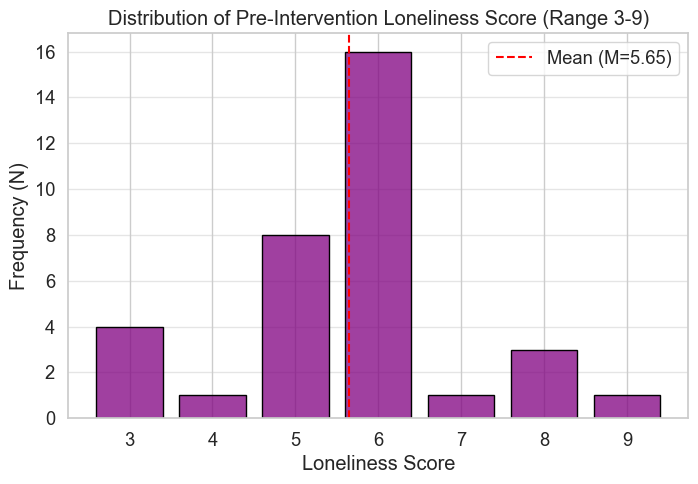

In [650]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. GENERAZIONE DELLA VISUALIZZAZIONE ---

plt.figure(figsize=(8, 5))
sns.histplot(
    final_output, 
    x='Loneliness_Pre', 
    bins=7, # Bin per ogni punteggio intero da 3 a 9
    discrete=True,
    color='purple',
    edgecolor='black',
    shrink=0.8 # Spazio tra le barre
)

plt.axvline(final_output['Loneliness_Pre'].mean(), color='red', linestyle='--', linewidth=1.5, label=f"Mean (M={final_output['Loneliness_Pre'].mean():.2f})")
plt.title('Distribution of Pre-Intervention Loneliness Score (Range 3-9)')
plt.xlabel('Loneliness Score')
plt.ylabel('Frequency (N)')
plt.xticks(range(3, 10)) # Forza le etichette per ogni punteggio
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.savefig("LON", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()



print("\n")

In [651]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf

# Assumiamo che il tuo DataFrame sia 'merged_df' e contenga le colonne necessarie
# (Q34_1, Q34_2, Q34_3, NA_Difference, Personalizzato)

# --- 1. MAPPATURA E CALCOLO DEL PUNTEGGIO DI SOLITUDINE ---

# Mappa le risposte testuali ai valori numerici (scala 1-4)
# (Assumiamo che l'ordine sia 'Mai', 'Raramente', 'Talvolta', 'Spesso')
likert_mapping = {
    'Never': 1,
    'Once in a while': 2,
    'Fairly often': 3,
    'Very often': 4
}

# Applica la mappatura alle colonne della solitudine. 
# NOTA: Assicurati che le stringhe qui sopra corrispondano ESATTAMENTE ai valori nel tuo DataFrame.
for col in ["Q34_1", "Q34_2", "Q34_3"]:
    merged_df[col + '_Numeric'] = merged_df[col].map(likert_mapping)
    
# Calcola il punteggio totale di solitudine pre-intervento (range 3-12)
merged_df['Loneliness_Pre'] = merged_df['Q34_1_Numeric'] + merged_df['Q34_2_Numeric'] + merged_df['Q34_3_Numeric']

print(f"Punteggio medio di Solitudine Pre: {merged_df['Loneliness_Pre'].mean():.2f}")
print("-" * 70)


# --- 2. ANALISI DI CORRELAZIONE TRA SOLITUDINE (PRE) E DELTA NA ---

print("\n--- Analisi di Correlazione Solitudine (Pre) vs. Delta NA (Post - Pre) ---")

# a) Correlazione per l'intero campione
r_total, p_total = stats.pearsonr(merged_df['Loneliness_Pre'], merged_df['NA_Difference'])
print(f"Totale Campione: r = {r_total:.3f}, p = {p_total:.3f}")

# b) Correlazione divisa per gruppo
df_si = merged_df[merged_df['Personalizzato'] == 'SI']
df_no = merged_df[merged_df['Personalizzato'] == 'NO']

r_si, p_si = stats.pearsonr(df_si['Loneliness_Pre'], df_si['NA_Difference'])
print(f"Gruppo 'SI' (Personalizzato): r = {r_si:.3f}, p = {p_si:.3f}")

r_no, p_no = stats.pearsonr(df_no['Loneliness_Pre'], df_no['NA_Difference'])
print(f"Gruppo 'NO' (Controllo): r = {r_no:.3f}, p = {p_no:.3f}")

print("-" * 70)

# --- 3. ANALISI DI MODERAZIONE (REGRESSIONE CON INTERAZIONE) ---

# Questa è la prova più robusta dell'ipotesi di moderazione.

# 3.1 Codifica della variabile Personalizzato: SI=1, NO=0 (Variabile Moderatrice)
merged_df['Personalized_Code'] = np.where(merged_df['Personalizzato'] == 'SI', 1, 0)

# 3.2 Esecuzione del Modello di Regressione
# Variazione NA (Dipendente) ~ Solitudine (Predittore) * Personalizzato (Moderatore)
formula = 'NA_Difference ~ Loneliness_Pre * Personalized_Code'

model = smf.ols(formula=formula, data=merged_df).fit()

print("\n--- Risultati Analisi di Moderazione (Regressione OLS) ---")
print(model.summary().tables[1])

# --- 4. INTERPRETAZIONE (Focus sul termine di interazione) ---
print("-" * 70)
print("Interpretazione: Il termine di interazione (Loneliness_Pre:Personalized_Code) è la chiave.")
print("Se il suo valore p è < 0.05, la Solitudine MODERA l'effetto della Personalizzazione.")

Punteggio medio di Solitudine Pre: 5.65
----------------------------------------------------------------------

--- Analisi di Correlazione Solitudine (Pre) vs. Delta NA (Post - Pre) ---
Totale Campione: r = -0.012, p = 0.945
Gruppo 'SI' (Personalizzato): r = -0.245, p = 0.343
Gruppo 'NO' (Controllo): r = 0.199, p = 0.443
----------------------------------------------------------------------

--- Risultati Analisi di Moderazione (Regressione OLS) ---
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          -10.5000      7.129     -1.473      0.151     -25.059       4.059
Loneliness_Pre                       0.9948      1.225      0.812      0.423      -1.506       3.496
Personalized_Code                    5.8985     10.229      0.577      0.568     -14.992      26.789
Loneliness_Pre:Personalized_Code    -2.1

In [652]:
import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf

# --- 0. PREPARAZIONE: NOMI E MAPPATURA ---

# Elenco delle 10 colonne in base al tuo schema di denominazione
commensality_cols = [f'meandcomm_{i}' for i in range(1, 11)]

# Colonne con formulazione NEGATIVA che necessitano di essere invertite (Reverse Scoring):
# Un punteggio alto (es. 5=Totally Agree) in questi item indica una BASSA preferenza per la commensalità.
# Basato sull'immagine:
negative_items = [
    'meandcomm_1', # I enjoy eating alone
    'meandcomm_2', # I enjoy eating in silence
    'meandcomm_4', # I often feel a strain while eating meals with others
    'meandcomm_5', # When given the choice, I prefer to eat a meal alone
    'meandcomm_7', # When eating I tend not to interact with other people around me
    'meandcomm_9'  # Eating or drinking with others makes me uncomfortable
]

# Mappatura Likert (da 1 a 5)
likert_mapping = {
    'Totally Disagree': 1,
    'Somewhat Disagree': 2,
    'Neither Agree not Disagree': 3,
    'Somewhat Agree': 4,
    'Totally Agree': 5
}

# --- 1. CALCOLO PUNTEGGIO COMPOSITO (COMMENSALITY_PRE) ---

# 1.1 Applica la mappatura a tutte le colonne
for col in commensality_cols:
    merged_df[col + '_Num'] = merged_df[col].map(likert_mapping)
    
# 1.2 Gestione dei dati mancanti: Rimuovi le righe con NA in queste colonne per un calcolo pulito
merged_df.dropna(subset=[col + '_Num' for col in commensality_cols], inplace=True)

# 1.3 Reverse Scoring (Inversione)
# La formula (5 + 1) - Original Score = 6 - Original Score
for col in negative_items:
    merged_df[col + '_Final'] = 6 - merged_df[col + '_Num']

# 1.4 Copia i valori finali per gli item che NON sono stati invertiti (Positive items)
positive_items = [c for c in commensality_cols if c not in negative_items]
for col in positive_items:
    merged_df[col + '_Final'] = merged_df[col + '_Num']

# 1.5 Calcola il punteggio totale (Range 10-50)
final_cols = [col + '_Final' for col in commensality_cols]
merged_df['Commensality_Pre'] = merged_df[final_cols].sum(axis=1)

print(f"Punteggio medio di Commensalità Pre: {merged_df['Commensality_Pre'].mean():.2f} (Range teorico 10-50)")
print("-" * 80)

# --- 1. PREPARAZIONE DELLE VARIABILI E CALCOLO ---
# (Assumiamo che il codice di mappatura e calcolo fornito dall'utente sia stato eseguito)

# Vengono utilizzate le colonne finali dopo l'inversione (reverse scoring)
commensality_cols = [f'meandcomm_{i}' for i in range(1, 11)]
final_cols = [col + '_Final' for col in commensality_cols]

# Aggiungiamo la colonna composita all'elenco da analizzare
cols_to_analyze = final_cols + ['Commensality_Pre']

# --- 2. CALCOLO DELLE STATISTICHE ---
desc_stats_all = merged_df[cols_to_analyze].describe()
variance_row = merged_df[cols_to_analyze].var().to_frame().T
variance_row.index = ['Varianza']

full_stats = pd.concat([desc_stats_all, variance_row])

# Rinomina l'indice per chiarezza in italiano (come richiesto in precedenza)
full_stats.rename(index={'count': 'Conteggio (N)', 
                         'mean': 'Media (M)', 
                         'std': 'Deviazione Standard (DS)', 
                         'min': 'Minimo', 
                         'max': 'Massimo', 
                         '25%': 'Q1',
                         '50%': 'Mediana (Q2)',
                         '75%': 'Q3'}, 
                  inplace=True)

print("\n" + "=" * 80)
print("STATISTICHE DESCRITTIVE DETTAGLIATE PER ITEM E PUNTEGGIO DI COMMENSALITÀ PRE")
print("I punteggi degli item sono già invertiti (Final) dove necessario, Range 1-5.")
print("Punteggio Totale (Commensality_Pre) Range 10-50.")
print("=" * 80)
print(full_stats.round(3))

# --- CREAZIONE DELLA TABELLA FINALE ---

# Ordina il DataFrame in base al punteggio Commensality_Pre (dal più basso al più alto)
df_ordered = merged_df.sort_values(by='Commensality_Pre', ascending=True).reset_index(drop=True)

# Seleziona e stampa solo le colonne richieste
final_output = df_ordered[['Q36', 'Commensality_Pre']]

print("\n" + "=" * 80)
print("PARTICIPANTS' COMMENSALITY SCORES (Ordered Low to High)")
print("==================================================================================")
# Uso to_string per una formattazione pulita in console
print(final_output.to_string(index=False))

Punteggio medio di Commensalità Pre: 37.47 (Range teorico 10-50)
--------------------------------------------------------------------------------

STATISTICHE DESCRITTIVE DETTAGLIATE PER ITEM E PUNTEGGIO DI COMMENSALITÀ PRE
I punteggi degli item sono già invertiti (Final) dove necessario, Range 1-5.
Punteggio Totale (Commensality_Pre) Range 10-50.
                          meandcomm_1_Final  meandcomm_2_Final  \
Conteggio (N)                        34.000             34.000   
Media (M)                             2.794              3.735   
Deviazione Standard (DS)              1.175              0.994   
Minimo                                1.000              1.000   
Q1                                    2.000              3.000   
Mediana (Q2)                          3.000              4.000   
Q3                                    4.000              4.000   
Massimo                               5.000              5.000   
Varianza                              1.381             

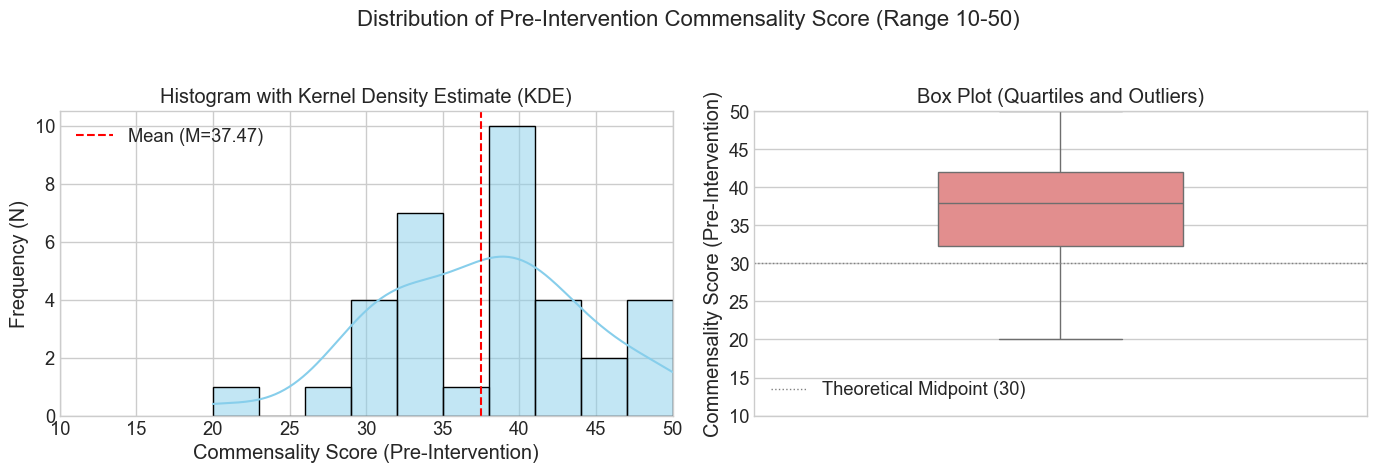

In [653]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 2. GENERAZIONE DELLE VISUALIZZAZIONI ---

plt.style.use('seaborn-v0_8-whitegrid') # Stile per chiarezza

# Crea una figura con due subplot (Istogramma e Box Plot)
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) 
fig.suptitle('Distribution of Pre-Intervention Commensality Score (Range 10-50)', fontsize=16)


# --- 2.1 Istogramma e KDE (Density Plot) ---
sns.histplot(
    merged_df, 
    x='Commensality_Pre', 
    bins=10, # Suddivide il range 20-50 in 10 barre
    kde=True, # Aggiunge la linea di densità stimata
    ax=axes[0],
    color='skyblue',
    edgecolor='black'
)

axes[0].axvline(merged_df['Commensality_Pre'].mean(), color='red', linestyle='--', linewidth=1.5, label=f"Mean (M={merged_df['Commensality_Pre'].mean():.2f})")
axes[0].set_title('Histogram with Kernel Density Estimate (KDE)')
axes[0].set_xlabel('Commensality Score (Pre-Intervention)')
axes[0].set_ylabel('Frequency (N)')
axes[0].legend()
axes[0].set_xlim(10, 50) # Imposta limiti sull'asse X per l'intero range teorico


# --- 2.2 Box Plot ---
sns.boxplot(
    y=merged_df['Commensality_Pre'], 
    ax=axes[1],
    color='lightcoral',
    width=0.4
)

axes[1].axhline(30, color='gray', linestyle=':', linewidth=1, label="Theoretical Midpoint (30)")
axes[1].set_title('Box Plot (Quartiles and Outliers)')
axes[1].set_ylabel('Commensality Score (Pre-Intervention)')
axes[1].set_ylim(10, 50) # Imposta limiti sull'asse Y per l'intero range teorico
axes[1].legend(loc='lower left')


plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ottimizza il layout
plt.savefig("COMM", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


print("\n")

In [654]:
# --- 2. ANALISI DI CORRELAZIONE ---

print("\n--- Correlazione Commensalità (Pre) vs. Delta NA (Post - Pre) ---")

# a) Correlazione per il gruppo Personalizzato (SI)
df_si = merged_df[merged_df['Personalizzato'] == 'SI']
r_si, p_si = stats.pearsonr(df_si['Commensality_Pre'], df_si['NA_Difference'])
print(f"Gruppo 'SI' (Personalizzato): r = {r_si:.3f}, p = {p_si:.3f}")

# b) Correlazione per il gruppo Controllo (NO)
df_no = merged_df[merged_df['Personalizzato'] == 'NO']
r_no, p_no = stats.pearsonr(df_no['Commensality_Pre'], df_no['NA_Difference'])
print(f"Gruppo 'NO' (Controllo): r = {r_no:.3f}, p = {p_no:.3f}")

print("-" * 80)


# --- 3. ANALISI DI MODERAZIONE (REGRESSIONE CON INTERAZIONE) ---

# Questa analisi testa se l'impatto della Commensalità è diverso tra i due gruppi.

# Codifica della variabile 'Personalizzato': SI=1, NO=0
merged_df['Personalized_Code'] = np.where(merged_df['Personalizzato'] == 'SI', 1, 0)

# Formula: Delta_NA ~ Commensality_Pre * Personalized_Code
formula = 'NA_Difference ~ Commensality_Pre * Personalized_Code'

model = smf.ols(formula=formula, data=merged_df).fit()

print("\n--- Risultati Analisi di Moderazione (Commensalità) ---")
print(model.summary().tables[1])

print("-" * 80)
print("INTERPRETAZIONE CHIAVE: L'efficacia della moderazione dipende dal p-value del termine di interazione (Commensality_Pre:Personalized_Code). Se p < 0.05, l'ipotesi è supportata.")


--- Correlazione Commensalità (Pre) vs. Delta NA (Post - Pre) ---
Gruppo 'SI' (Personalizzato): r = 0.107, p = 0.683
Gruppo 'NO' (Controllo): r = -0.051, p = 0.847
--------------------------------------------------------------------------------

--- Risultati Analisi di Moderazione (Commensalità) ---
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             -2.8940     10.019     -0.289      0.775     -23.356      17.568
Commensality_Pre                      -0.0535      0.265     -0.202      0.842      -0.595       0.488
Personalized_Code                    -12.6328     14.491     -0.872      0.390     -42.228      16.962
Commensality_Pre:Personalized_Code     0.1640      0.381      0.431      0.670      -0.614       0.942
-------------------------------------------------------------------------------

In [655]:
import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf

# --- 0. PREPARAZIONE: NOMI E MAPPATURA ---

# Elenco delle 4 colonne in base al tuo schema di denominazione
tech_cols = [f'useoftech_{i}' for i in range(1, 5)] 

# useoftech_1: Do you think that using devices... is an acceptable practice? (ITEM POSITIVO)
# Gli altri item (2, 3, 4) sono negativi (misurano direttamente disagio/stress/interazione alterata)

# ITEM POSITIVO da INVERTIRE (useoftech_1)
positive_item = 'useoftech_1' 
negative_items = ['useoftech_2', 'useoftech_3', 'useoftech_4']

# Mappatura Likert (da 1 a 5)
likert_mapping = {
    'Totally Disagree': 1,
    'Somewhat Disagree': 2,
    'Neither Agree nor Disagree': 3,
    'Somewhat Agree': 4,
    'Totally Agree': 5
}

# --- 1. CALCOLO PUNTEGGIO COMPOSITO (TechDiscomfort_Pre) ---

# 1.1 Applica la mappatura a tutte le colonne
for col in tech_cols:
    merged_df[col + '_Num'] = merged_df[col].map(likert_mapping)
    
# 1.2 Gestione dei dati mancanti: Rimuovi le righe con NA in queste colonne per un calcolo pulito
merged_df.dropna(subset=[col + '_Num' for col in tech_cols], inplace=True)

# 1.3 Reverse Scoring per l'item useoftech_1 (accettabilità)
# Un punteggio alto in questo item indica 'basso disagio'. Per allinearlo con 'alto disagio', lo invertiamo.
# Formula: Reverse Score = 6 - Original Score
merged_df[positive_item + '_Final'] = 6 - merged_df[positive_item + '_Num']

# 1.4 Copia i valori finali per gli item NEGATIVI (non invertire)
for col in negative_items:
    merged_df[col + '_Final'] = merged_df[col + '_Num']

# 1.5 Calcola il punteggio totale (Range 4-20)
final_cols = [col + '_Final' for col in tech_cols]
merged_df['TechDiscomfort_Pre'] = merged_df[final_cols].sum(axis=1)

print(f"Punteggio medio di Tecno-Disagio Pre: {merged_df['TechDiscomfort_Pre'].mean():.2f} (Range teorico 4-20)")
print("-" * 80)


# --- 2. ANALISI DI MODERAZIONE (REGRESSIONE OLS) ---

# Codifica la variabile 'Personalizzato': SI=1, NO=0 (se non l'hai già fatto)
merged_df['Personalized_Code'] = np.where(merged_df['Personalizzato'] == 'SI', 1, 0)

# Formula: Delta_NA ~ TechDiscomfort_Pre * Personalized_Code
formula = 'NA_Difference ~ TechDiscomfort_Pre * Personalized_Code'

model = smf.ols(formula=formula, data=merged_df).fit()

print("\n--- Risultati Analisi di Moderazione (Tecno-Disagio) ---")
print(model.summary().tables[1])

print("-" * 80)
print("INTERPRETAZIONE CHIAVE: L'efficacia della moderazione è data dal p-value del termine di interazione (TechDiscomfort_Pre:Personalized_Code). Se p < 0.05, l'ipotesi è supportata.")

Punteggio medio di Tecno-Disagio Pre: 11.44 (Range teorico 4-20)
--------------------------------------------------------------------------------

--- Risultati Analisi di Moderazione (Tecno-Disagio) ---
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -2.3899      5.622     -0.425      0.674     -13.871       9.091
TechDiscomfort_Pre                      -0.2087      0.447     -0.467      0.644      -1.122       0.704
Personalized_Code                       -5.2570      9.097     -0.578      0.568     -23.836      13.322
TechDiscomfort_Pre:Personalized_Code    -0.1300      0.776     -0.168      0.868      -1.714       1.454
--------------------------------------------------------------------------------
INTERPRETAZIONE CHIAVE: L'efficacia della moderazione è data dal p-value del termine 

In [656]:
import pandas as pd
from scipy import stats
import numpy as np

# --- 2. CALCOLO PUNTEGGIO COMPOSITO (TechDiscomfort_Pre) (IL TUO CODICE) ---

# Nomi colonne e mappatura
tech_cols = [f'useoftech_{i}' for i in range(1, 5)] 
positive_item = 'useoftech_1' 
negative_items = ['useoftech_2', 'useoftech_3', 'useoftech_4']

likert_mapping = {
    'Totally Disagree': 1,
    'Somewhat Disagree': 2,
    'Neither Agree nor Disagree': 3,
    'Somewhat Agree': 4,
    'Totally Agree': 5
}

# 2.1 Applica la mappatura
for col in tech_cols:
    merged_df[col + '_Num'] = merged_df[col].map(likert_mapping)
    
# 2.2 Gestione dei dati mancanti (anche se in simulazione non ci sono)
merged_df.dropna(subset=[col + '_Num' for col in tech_cols], inplace=True)

# 2.3 Reverse Scoring per l'item useoftech_1 (accettabilità -> Disagio)
merged_df[positive_item + '_Final'] = 6 - merged_df[positive_item + '_Num']

# 2.4 Copia i valori finali per gli item NEGATIVI
for col in negative_items:
    merged_df[col + '_Final'] = merged_df[col + '_Num']

# 2.5 Calcola il punteggio totale (Range 4-20)
final_cols = [col + '_Final' for col in tech_cols]
merged_df['TechDiscomfort_Pre'] = merged_df[final_cols].sum(axis=1)


# --- 3. ANALISI STATISTICA DI 'TechDiscomfort_Pre' ---

# Variabile di interesse
discomfort_scores = merged_df['TechDiscomfort_Pre']

# 3.1 STATISTICHE DESCRITTIVE
print("\n" + "="*50)
print("1. STATISTICHE DESCRITTIVE: TechDiscomfort_Pre (Range 4-20)")
print("="*50)

# Calcolo delle statistiche
M = discomfort_scores.mean()
SD = discomfort_scores.std()
Min = discomfort_scores.min()
Max = discomfort_scores.max()
N = discomfort_scores.count()

# Stampa i risultati
desc_stats = pd.DataFrame({
    'Statistica': ['N', 'Media (M)', 'Dev. Standard (SD)', 'Minimo', 'Massimo', 'Varianza'],
    'Valore': [N, M, SD, Min, Max, SD**2]
})
print(desc_stats.to_string(index=False, float_format="%.3f"))

# 3.2 TEST DI NORMALITÀ (SHAPIRO–WILK)
print("\n" + "="*50)
print("2. TEST DI NORMALITÀ: Shapiro–Wilk")
print("="*50)

# Esecuzione del test
shapiro_w, shapiro_p = stats.shapiro(discomfort_scores)

print(f"Statistica (W): {shapiro_w:.4f}")
print(f"P-value: {shapiro_p:.4f}")

# Interpretazione
if shapiro_p > 0.05:
    conclusion = "Non si può rifiutare l'ipotesi nulla. La distribuzione è compatibile con la normalità."
else:
    conclusion = "Si rifiuta l'ipotesi nulla. La distribuzione si discosta significativamente dalla normalità."

print(f"\nConclusione: {conclusion}")
print("="*50 + "\n")

# --- 4. OUTPUT PER LA REPORTISTICA (Inclusa la variabile creata) ---

# Creiamo una tabella riepilogativa per la reportistica finale
report_table = pd.DataFrame({
    'Variabile': ['TechDiscomfort_Pre'],
    'N': [N],
    'Media': [M],
    'SD': [SD],
    'Min': [Min],
    'Max': [Max],
    'W': [shapiro_w],
    'p-value': [shapiro_p]
})

print("TABELLA RIASSUNTIVA PER REPORTISTICA:")
print(report_table.to_string(index=False, float_format="%.3f"))


1. STATISTICHE DESCRITTIVE: TechDiscomfort_Pre (Range 4-20)
        Statistica  Valore
                 N  34.000
         Media (M)  11.441
Dev. Standard (SD)   3.492
            Minimo   5.000
           Massimo  20.000
          Varianza  12.193

2. TEST DI NORMALITÀ: Shapiro–Wilk
Statistica (W): 0.9689
P-value: 0.4327

Conclusione: Non si può rifiutare l'ipotesi nulla. La distribuzione è compatibile con la normalità.

TABELLA RIASSUNTIVA PER REPORTISTICA:
         Variabile  N  Media    SD  Min  Max     W  p-value
TechDiscomfort_Pre 34 11.441 3.492    5   20 0.969    0.433


In [657]:
len(merged_df)

34

In [658]:
import pandas as pd
from scipy import stats
import numpy as np
import statsmodels.formula.api as smf

# --- 0. PREPARAZIONE: NOMI E MAPPATURA ---

# Elenco delle 5 colonne in base al tuo schema di denominazione
techfreq_cols = [f'useoftech2_{i}' for i in range(1, 6)] 

# Mappatura della Frequenza (Assumiamo che l'ordine sia come nell'immagine d04549)
freq_mapping = {
    'Never': 1,
    '1 time a week': 2,
    '2 to 3 times a week': 3,
    '4 to 5 times a week': 4,
    'Once a day': 5,
    'Multiple times a day': 6
}

# --- 1. CALCOLO PUNTEGGIO COMPOSITO (TechFreq_Pre) ---

# 1.1 Applica la mappatura a tutte le colonne
for col in techfreq_cols:
    merged_df[col + '_Num'] = merged_df[col].map(freq_mapping)
    
# 1.2 Gestione dei dati mancanti: Rimuovi le righe con NA in queste colonne per un calcolo pulito
merged_df.dropna(subset=[col + '_Num' for col in techfreq_cols], inplace=True)

# 1.3 Calcola il punteggio totale (Range 5-30)
final_cols = [col + '_Num' for col in techfreq_cols]
# Non serve il reverse scoring, assumiamo che più frequenza sia semplicemente un valore più alto.
merged_df['TechFreq_Pre'] = merged_df[final_cols].sum(axis=1)

print(f"Punteggio medio di Frequenza d'Uso Tecnologia Pre: {merged_df['TechFreq_Pre'].mean():.2f} (Range teorico 5-30)")
print("-" * 80)


# --- 2. ANALISI DI MODERAZIONE (REGRESSIONE OLS) ---

# Codifica la variabile 'Personalizzato': SI=1, NO=0 (se non l'hai già fatto)
merged_df['Personalized_Code'] = np.where(merged_df['Personalizzato'] == 'SI', 1, 0)

# Formula: Delta_NA ~ TechFreq_Pre * Personalized_Code
formula = 'NA_Difference ~ TechFreq_Pre * Personalized_Code'

model = smf.ols(formula=formula, data=merged_df).fit()

print("\n--- Risultati Analisi di Moderazione (Frequenza d'Uso Tecnologia) ---")
print(model.summary().tables[1])

print("-" * 80)
print("INTERPRETAZIONE CHIAVE: L'efficacia della moderazione è data dal p-value del termine di interazione (TechFreq_Pre:Personalized_Code). Se p < 0.05, l'ipotesi è supportata.")

Punteggio medio di Frequenza d'Uso Tecnologia Pre: 17.50 (Range teorico 5-30)
--------------------------------------------------------------------------------

--- Risultati Analisi di Moderazione (Frequenza d'Uso Tecnologia) ---
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                         -5.9055      7.721     -0.765      0.450     -21.673       9.862
TechFreq_Pre                       0.0572      0.421      0.136      0.893      -0.802       0.917
Personalized_Code                -17.4718     11.806     -1.480      0.149     -41.582       6.639
TechFreq_Pre:Personalized_Code     0.6452      0.663      0.974      0.338      -0.708       1.999
--------------------------------------------------------------------------------
INTERPRETAZIONE CHIAVE: L'efficacia della moderazione è data dal p-value del termine di interaz

In [659]:
import pandas as pd
from scipy import stats
import numpy as np

# --- 2. CALCOLO PUNTEGGIO COMPOSITO (TechFreq_Pre) (IL TUO CODICE) ---

# Nomi colonne e mappatura
techfreq_cols = [f'useoftech2_{i}' for i in range(1, 6)] 

freq_mapping = {
    'Never': 1,
    '1 time a week': 2,
    '2 to 3 times a week': 3,
    '4 to 5 times a week': 4,
    'Once a day': 5,
    'Multiple times a day': 6
}

# 2.1 Applica la mappatura
for col in techfreq_cols:
    merged_df[col + '_Num'] = merged_df[col].map(freq_mapping)
    
# 2.2 Gestione dei dati mancanti 
cols_to_check = [col + '_Num' for col in techfreq_cols]
merged_df.dropna(subset=cols_to_check, inplace=True)

# 2.3 Calcola il punteggio totale (Range 5-30)
merged_df['TechFreq_Pre'] = merged_df[cols_to_check].sum(axis=1)

# Stampa di controllo (come nel tuo codice)
# print(f"Punteggio medio di Frequenza d'Uso Tecnologia Pre: {merged_df['TechFreq_Pre'].mean():.2f} (Range teorico 5-30)")
# print("-" * 80)


# --- 3. ANALISI STATISTICA DI 'TechFreq_Pre' ---

# Variabile di interesse
freq_scores = merged_df['TechFreq_Pre']

# 3.1 STATISTICHE DESCRITTIVE
print("\n" + "="*70)
print("1. STATISTICHE DESCRITTIVE: TechFreq_Pre (Frequenza Uso Tecnologia, Range 5-30)")
print("="*70)

# Calcolo delle statistiche
M = freq_scores.mean()
SD = freq_scores.std()
Min = freq_scores.min()
Max = freq_scores.max()
N = freq_scores.count()
Variance = SD**2

# Stampa i risultati
desc_stats = pd.DataFrame({
    'Statistica': ['N', 'Media (M)', 'Dev. Standard (SD)', 'Minimo', 'Massimo', 'Varianza'],
    'Valore': [N, M, SD, Min, Max, Variance]
})
print(desc_stats.to_string(index=False, float_format="%.3f"))

# 3.2 TEST DI NORMALITÀ (SHAPIRO–WILK)
print("\n" + "="*70)
print("2. TEST DI NORMALITÀ: Shapiro–Wilk per TechFreq_Pre")
print("="*70)

# Esecuzione del test
# Nota: il test di Shapiro-Wilk richiede almeno 3 osservazioni
if N >= 3:
    shapiro_w, shapiro_p = stats.shapiro(freq_scores)

    print(f"Statistica (W): {shapiro_w:.4f}")
    print(f"P-value: {shapiro_p:.4f}")

    # Interpretazione
    if shapiro_p > 0.05:
        conclusion = "Non si può rifiutare l'ipotesi nulla. La distribuzione è compatibile con la normalità."
    else:
        conclusion = "Si rifiuta l'ipotesi nulla. La distribuzione si discosta significativamente dalla normalità."

    print(f"\nConclusione: {conclusion}")
else:
    print("Campione troppo piccolo per il Test di Shapiro-Wilk (N < 3).")
    
print("="*70 + "\n")

# --- 4. TABELLA RIASSUNTIVA PER REPORTISTICA ---

if N >= 3:
    report_table = pd.DataFrame({
        'Variabile': ['TechFreq_Pre'],
        'N': [N],
        'Media': [M],
        'SD': [SD],
        'Min': [Min],
        'Max': [Max],
        'W': [shapiro_w],
        'p-value': [shapiro_p]
    })

    print("TABELLA RIASSUNTIVA PER REPORTISTICA:")
    print(report_table.to_string(index=False, float_format="%.3f"))


1. STATISTICHE DESCRITTIVE: TechFreq_Pre (Frequenza Uso Tecnologia, Range 5-30)
        Statistica  Valore
                 N  34.000
         Media (M)  17.500
Dev. Standard (SD)   3.816
            Minimo  10.000
           Massimo  29.000
          Varianza  14.561

2. TEST DI NORMALITÀ: Shapiro–Wilk per TechFreq_Pre
Statistica (W): 0.9557
P-value: 0.1815

Conclusione: Non si può rifiutare l'ipotesi nulla. La distribuzione è compatibile con la normalità.

TABELLA RIASSUNTIVA PER REPORTISTICA:
   Variabile  N  Media    SD  Min  Max     W  p-value
TechFreq_Pre 34 17.500 3.816   10   29 0.956    0.181


In [660]:
len(merged_df)

34

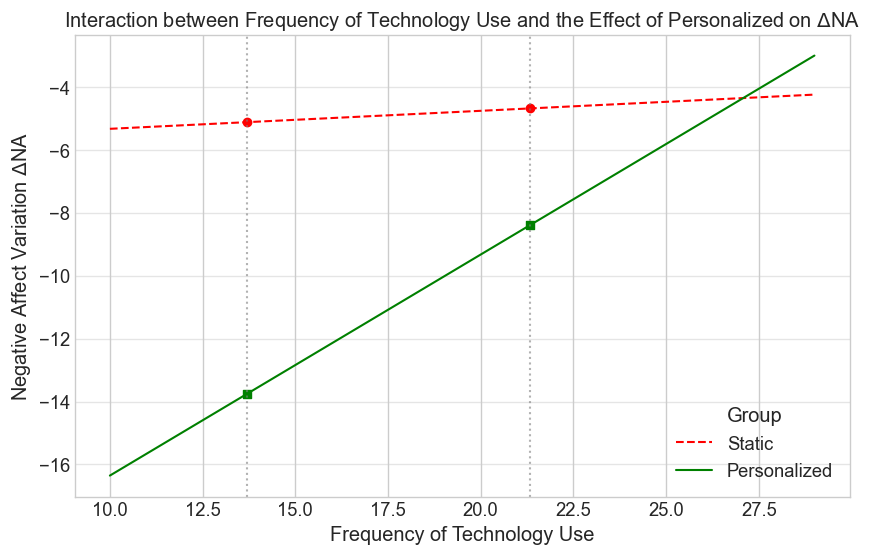

C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\3147437932.py:105: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = merged_df.groupby(['Design', 'Freq_Level'])['NA_Difference'].mean().unstack()


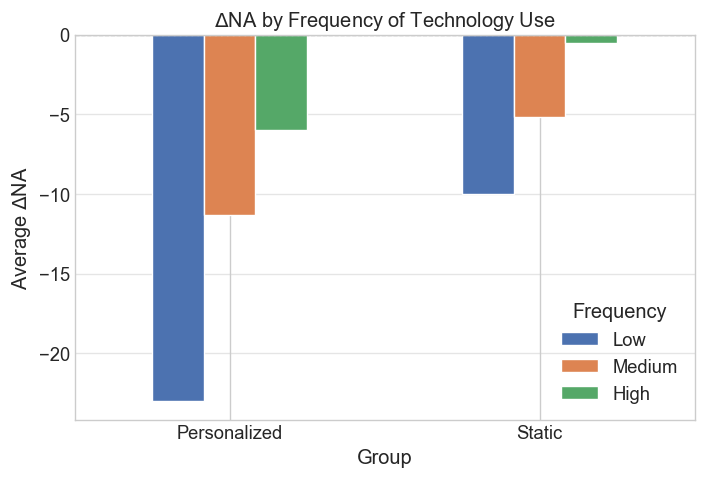

In [661]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Assumiamo che il tuo DataFrame 'merged_df' sia già pronto e pulito.
# Assumiamo che il modello 'model' sia quello che hai eseguito per TechFreq_Pre:
# formula = 'NA_Difference ~ TechFreq_Pre * Personalized_Code'
# model = smf.ols(formula=formula, data=merged_df).fit() 

# --- Aggiungi qui il codice di preparazione del modello OLS e il DataFrame! ---
# Per la corretta esecuzione del codice, devi assicurarti che queste righe siano nel tuo script
# se non l'hai già fatto nel contesto della tua sessione:

# 1. Preparazione delle variabili (Esempio, adatta se necessario)
# merged_df['Personalized_Code'] = np.where(merged_df['Personalizzato'] == 'SI', 1, 0)
# techfreq_cols = [f'useoftech2_{i}_Num' for i in range(1, 6)] 
# merged_df['TechFreq_Pre'] = merged_df[techfreq_cols].sum(axis=1)

# 2. Definizione della formula e fit del modello
# formula = 'NA_Difference ~ TechFreq_Pre * Personalized_Code'
# model = smf.ols(formula=formula, data=merged_df).fit() 
# ---------------------------------------------------------------------------------


# --- 1. Calcolo dei Punti per il Grafico di Interazione ---

# Calcola media e deviazione standard per TechFreq_Pre
mean_freq = merged_df['TechFreq_Pre'].mean()
std_freq = merged_df['TechFreq_Pre'].std()

# Definisci i punti Basso (Mean - 1SD) e Alto (Mean + 1SD) e il range per la linea
low_freq = mean_freq - std_freq
high_freq = mean_freq + std_freq
x_range = np.linspace(merged_df['TechFreq_Pre'].min(), merged_df['TechFreq_Pre'].max(), 100)

# Crea un DataFrame fittizio per le previsioni
pred_data = pd.DataFrame({
    'TechFreq_Pre': np.tile(x_range, 2),  # 100 valori per SI e 100 per NO
    'Personalized_Code': np.repeat([0, 1], len(x_range)) # 0 per NO, 1 per SI
})

# Esegui la previsione
pred_data['NA_Difference_Pred'] = model.predict(pred_data)

# Separa i risultati per la linea del grafico
pred_no = pred_data[pred_data['Personalized_Code'] == 0]
pred_si = pred_data[pred_data['Personalized_Code'] == 1]

# Punti Basso/Alto per visualizzare i risultati del test post-hoc
# Questi punti sono utili per interpretare l'effetto:
low_pred_no = model.predict({'TechFreq_Pre': low_freq, 'Personalized_Code': 0})[0]
high_pred_no = model.predict({'TechFreq_Pre': high_freq, 'Personalized_Code': 0})[0]
low_pred_si = model.predict({'TechFreq_Pre': low_freq, 'Personalized_Code': 1})[0]
high_pred_si = model.predict({'TechFreq_Pre': high_freq, 'Personalized_Code': 1})[0]

# --- 2. Grafico di Interazione ---

plt.figure(figsize=(10, 6))

# Linee di regressione previste
plt.plot(pred_no['TechFreq_Pre'], pred_no['NA_Difference_Pred'], 
         label='Static', color='red', linestyle='--')
plt.plot(pred_si['TechFreq_Pre'], pred_si['NA_Difference_Pred'], 
         label='Personalized', color='green', linestyle='-')

# Punti per Basso/Alto (solo per riferimento visivo)
plt.scatter([low_freq, high_freq], [low_pred_no, high_pred_no], color='red', marker='o')
plt.scatter([low_freq, high_freq], [low_pred_si, high_pred_si], color='green', marker='s')

# Linee verticali per indicare Media -1DS e Media +1DS
plt.axvline(low_freq, color='gray', linestyle=':', alpha=0.6)
plt.axvline(high_freq, color='gray', linestyle=':', alpha=0.6)

# Etichette e Titoli
plt.title('Interaction between Frequency of Technology Use and the Effect of Personalized on $\Delta$NA')
plt.xlabel('Frequency of Technology Use')
plt.ylabel('Negative Affect Variation $\Delta$NA')
plt.legend(title='Group')
plt.grid(axis='y', alpha=0.5)

plt.savefig("FREQTECH1", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()



# --- 3. Grafico a Barre (Visualizzazione Semplificata) ---

# Raggruppamento per Basso e Alto (Media -/+ 1DS)
merged_df['Freq_Level'] = pd.cut(merged_df['TechFreq_Pre'], 
                                 bins=[-np.inf, low_freq, high_freq, np.inf],
                                 labels=['Low', 'Medium', 'High'],
                                 include_lowest=True)

# Mappa i valori direttamente dalla colonna 'Personalizzato'
mapping_dict = {'SI': 'Personalized', 'NO': 'Static'}

# Crea la nuova colonna 'Design' applicando la mappa
merged_df['Design'] = merged_df['Personalizzato'].map(mapping_dict)

# Nota: Qualsiasi altro valore (es. NaN, un errore di battitura)
# nella colonna 'Personalizzato' risulterà in NaN nella colonna 'Design'.

# Calcola la media di Delta NA per ogni combinazione di Gruppo e Livello di Frequenza
bar_data = merged_df.groupby(['Design', 'Freq_Level'])['NA_Difference'].mean().unstack()

plt.figure(figsize=(8, 5))
bar_data.plot(kind='bar', rot=0, ax=plt.gca())

plt.title('$\Delta$NA by Frequency of Technology Use')
plt.xlabel('Group')
plt.ylabel('Average $\Delta$NA')
plt.legend(title='Frequency')
plt.grid(axis='y', alpha=0.5)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--') # Linea di non-cambiamento
plt.savefig("FREQTECH2", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()



C:\Users\gabri\AppData\Local\Temp\ipykernel_16468\4293111136.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mean_na = merged_df.groupby(['Personalizzato', 'Freq_Level_Real'])['NA_Difference'].mean().unstack()


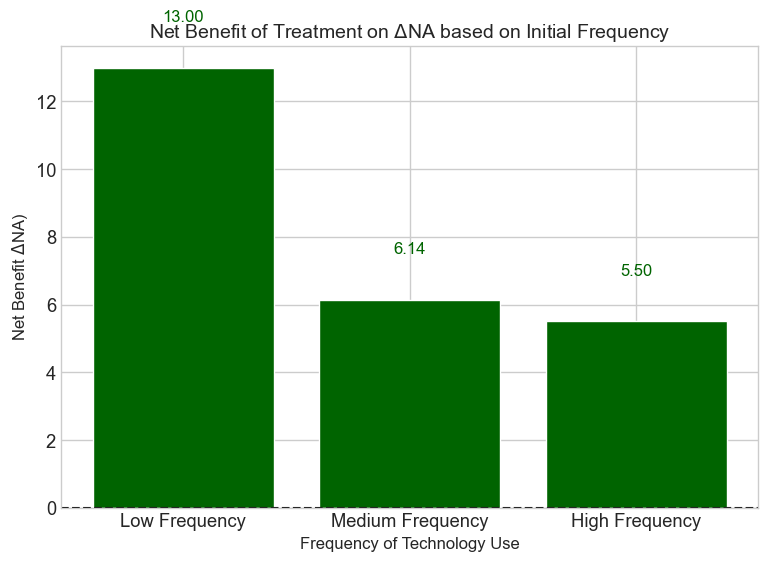

In [662]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # Uso seaborn per un look più pulito

# --- 1. Ricalcolo delle Variabili di Raggruppamento ---

# Calcola media e deviazione standard della variabile moderatrice (TechFreq_Pre)
mean_freq = merged_df['TechFreq_Pre'].mean()
std_freq = merged_df['TechFreq_Pre'].std()

# Definisce i bin (intervalli) per Bassa (Media - 1DS) e Alta (Media + 1DS)
low_freq = mean_freq - std_freq
high_freq = mean_freq + std_freq

# Crea la variabile categoriale Freq_Level (necessaria per il grafico a barre)
merged_df['Freq_Level_Real'] = pd.cut(merged_df['TechFreq_Pre'], 
                                      bins=[-np.inf, low_freq, high_freq, np.inf],
                                      labels=['Low Frequency', 'Medium Frequency', 'High Frequency'],
                                      include_lowest=True)

# --- 2. Calcolo dei Valori Medi Esatti (df_mean_na) ---

# Calcola le medie esatte di Delta NA raggruppate per Gruppo e Livello di Frequenza
# Questa è la parte cruciale che usa i tuoi dati veri
df_mean_na = merged_df.groupby(['Personalizzato', 'Freq_Level_Real'])['NA_Difference'].mean().unstack()

# Trasponi il DataFrame per avere SI e NO come indici
df_mean_na = df_mean_na.transpose() 


# --- 3. Calcolo del Beneficio Netto Esatto ---

# Beneficio Netto = Media NA_Controllo (NO) - Media NA_Trattamento (SI)
# (Un valore positivo significa che SI è migliore di NO)
net_benefit_real = df_mean_na['NO'] - df_mean_na['SI']

# --- 4. Generazione del Grafico (Beneficio Netto) ---

plt.figure(figsize=(9, 6))
sns.set_style("whitegrid")

# Creazione delle barre con colori basati sul Beneficio
bars = plt.bar(net_benefit_real.index, net_benefit_real.values, 
               color=['darkgreen' if b > 0 else 'firebrick' for b in net_benefit_real.values])

# Aggiunta di una linea orizzontale a zero (No Effetto)
plt.axhline(0, color='black', linewidth=1.5, linestyle='--')

# Etichette dei valori (per chiarezza)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + np.sign(yval) * 1.5, 
             f'{yval:.2f}', ha='center', va='center', fontsize=12, 
             color=('darkgreen' if yval > 0 else 'firebrick'))

# Etichette e Titoli
plt.title('Net Benefit of Treatment on $\Delta$NA based on Initial Frequency', fontsize=14)
plt.xlabel('Frequency of Technology Use', fontsize=12)
plt.ylabel('Net Benefit $\Delta$NA)', fontsize=12)
plt.xticks(rotation=0)

plt.savefig("FREQTECH3", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()


In [663]:
# 2. Unisci i punteggi OCEAN al merged_df
# Assumo che la colonna ID si chiami 'Q36' in entrambi i DataFrame
merged_df = merged_df.merge(scores, on='Q36', how='left')

print("Punteggi OCEAN uniti al merged_df con successo.")

# ====================================================================================
# === 3. ANALISI DI CORRELAZIONE TRA BIG FIVE (OCEAN) E DELTA NA ===

ocean_traits = [
    'Openness', 
    'Conscientiousness', 
    'Extraversion', 
    'Agreeableness', 
    'Neuroticism'
]

target_var = 'NA_Difference'

print("\n--- Correlazione Personalità (Pre) vs. Delta NA (Post - Pre) ---")

# Dividi il DataFrame per gruppo
df_si = merged_df[merged_df['Personalizzato'] == 'SI'].copy()
df_no = merged_df[merged_df['Personalizzato'] == 'NO'].copy()

results = {}

for trait in ocean_traits:
    
    # Pulizia dati mancanti (solo per le colonne in analisi)
    df_si_clean = df_si.dropna(subset=[trait, target_var])
    df_no_clean = df_no.dropna(subset=[trait, target_var])
    
    # Correlazione Gruppo SI
    r_si, p_si = stats.pearsonr(df_si_clean[trait], df_si_clean[target_var])
    
    # Correlazione Gruppo NO
    r_no, p_no = stats.pearsonr(df_no_clean[trait], df_no_clean[target_var])
    
    results[trait] = {
        'r_SI': f'{r_si:.3f}', 
        'p_SI': f'{p_si:.3f}',
        'r_NO': f'{r_no:.3f}',
        'p_NO': f'{p_no:.3f}'
    }

# Stampa i risultati
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index.name = "Tratto di Personalità"

print(results_df)

Punteggi OCEAN uniti al merged_df con successo.

--- Correlazione Personalità (Pre) vs. Delta NA (Post - Pre) ---
                         r_SI   p_SI    r_NO   p_NO
Tratto di Personalità                              
Openness               -0.418  0.095  -0.262  0.310
Conscientiousness      -0.313  0.222   0.117  0.654
Extraversion            0.087  0.741   0.119  0.649
Agreeableness           0.396  0.116  -0.200  0.442
Neuroticism             0.512  0.036  -0.342  0.179


In [664]:
len(merged_df)

34

In [665]:
print(merged_df.columns.tolist())

['StartDate_Pre', 'EndDate_Pre', 'Status_Pre', 'IPAddress_Pre', 'Progress_Pre', 'Duration (in seconds)_Pre', 'Finished_Pre', 'RecordedDate_Pre', 'ResponseId_Pre', 'RecipientLastName_Pre', 'RecipientFirstName_Pre', 'RecipientEmail_Pre', 'ExternalReference_Pre', 'LocationLatitude_Pre', 'LocationLongitude_Pre', 'DistributionChannel_Pre', 'UserLanguage_Pre', 'consentage', 'consent', 'name', 'confirm', 'aware', 'particip', 'name2', 'Q36', 'Q17', 'Q18', 'Q19', 'Q20', 'Q22', 'Q24', 'Q26', 'Q27', 'Q28', 'Q29_1', 'Q29_2', 'Q29_3', 'Q29_4', 'Q29_5', 'Q29_6', 'Q29_7', 'Q29_8', 'Q29_9', 'Q29_10', 'Q29_11', 'Q29_12', 'Q29_13', 'Q29_14', 'Q29_15', 'meandcomm_1', 'meandcomm_2', 'meandcomm_3', 'meandcomm_4', 'meandcomm_5', 'meandcomm_6', 'meandcomm_7', 'meandcomm_8', 'meandcomm_9', 'meandcomm_10', 'freqeat_1', 'freqeat_2', 'freqeat_3', 'freqeat_4', 'useoftech_1', 'useoftech_2', 'useoftech_3', 'useoftech_4', 'useoftech2_1', 'useoftech2_2', 'useoftech2_3', 'useoftech2_4', 'useoftech2_5', 'Q33_1', 'Q33_2

In [666]:
import statsmodels.formula.api as smf
# Assumo che NA_Difference e Personalized_Code siano già presenti e pulite

# Formula: Delta_NA ~ Nevroticismo * Personalized_Code
formula_neuroticism = 'NA_Difference ~ Neuroticism * Personalized_Code'

# Creazione di un DataFrame TEMPORANEO e pulito SOLO per questo test
df_clean_n = merged_df.dropna(subset=['Neuroticism', 'Personalized_Code', 'NA_Difference']).copy()
N_n = len(df_clean_n)

model_neuroticism = smf.ols(formula=formula_neuroticism, data=df_clean_n).fit()

print(f"\n--- Risultati Moderazione: Nevroticismo (N={N_n}) ---")
print(model_neuroticism.summary().tables[1])


--- Risultati Moderazione: Nevroticismo (N=34) ---
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.4634      7.705      0.839      0.408      -9.272      22.199
Neuroticism                      -2.5147      1.670     -1.505      0.143      -5.926       0.897
Personalized_Code               -35.2374     11.323     -3.112      0.004     -58.363     -12.112
Neuroticism:Personalized_Code     6.3810      2.461      2.593      0.015       1.355      11.407


In [667]:
# Formula: Delta_NA ~ Apertura * Personalized_Code
formula_openness = 'NA_Difference ~ Openness * Personalized_Code'

# Creazione di un DataFrame TEMPORANEO e pulito SOLO per questo test
df_clean_o = merged_df.dropna(subset=['Openness', 'Personalized_Code', 'NA_Difference']).copy()
N_o = len(df_clean_o)

model_openness = smf.ols(formula=formula_openness, data=df_clean_o).fit()

print(f"\n--- Risultati Moderazione: Apertura (N={N_o}) ---")
print(model_openness.summary().tables[1])


--- Risultati Moderazione: Apertura (N=34) ---
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                      1.6385      6.114      0.268      0.791     -10.848      14.125
Openness                      -1.7512      1.580     -1.108      0.276      -4.978       1.475
Personalized_Code              0.4275     10.202      0.042      0.967     -20.408      21.263
Openness:Personalized_Code    -1.3609      2.436     -0.559      0.581      -6.336       3.614


In [668]:
try:
    merged_df.to_excel("merged_qualtrics_finale.xlsx", index=False)
except:
    print("\n--- ATTENZIONE: FILE NON SALVATO ---\nExcel aperto, chiuderlo per salvarne una versione nuova!")

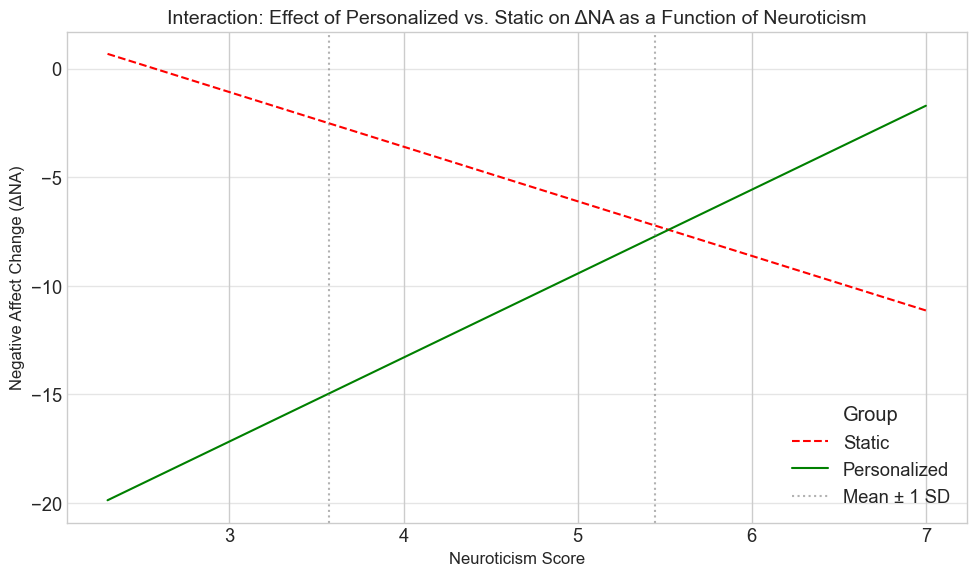

In [669]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# --- 1. MODEL PREPARATION AND DATA POINTS ---

# Assuming 'merged_df' contains the cleaned dataset and Personalized_Code = 0/1

# 1.1 Run OLS regression model (on cleaned data)
df_clean_n = merged_df.dropna(subset=['Neuroticism', 'Personalized_Code', 'NA_Difference']).copy()
formula_n = 'NA_Difference ~ Neuroticism * Personalized_Code'
model_Neuroticism = smf.ols(formula=formula_n, data=df_clean_n).fit()

# 1.2 Compute mean and standard deviation for Low/High Neuroticism
mean_n = merged_df['Neuroticism'].mean()
std_n = merged_df['Neuroticism'].std()
low_n = mean_n - std_n
high_n = mean_n + std_n

# 1.3 Create range for X-axis based on observed Neuroticism values
x_range = np.linspace(merged_df['Neuroticism'].min(), merged_df['Neuroticism'].max(), 100)

# 1.4 Create a prediction DataFrame
pred_data = pd.DataFrame({
    'Neuroticism': np.tile(x_range, 2),       # 100 values for each group
    'Personalized_Code': np.repeat([0, 1], len(x_range))  # 0 = Static, 1 = Personalized
})

# 1.5 Generate model predictions
pred_data['NA_Difference_Pred'] = model_Neuroticism.predict(pred_data)

# 1.6 Separate predicted lines for the two groups
pred_static = pred_data[pred_data['Personalized_Code'] == 0]
pred_personalized = pred_data[pred_data['Personalized_Code'] == 1]

# --- 2. INTERACTION PLOT ---

plt.figure(figsize=(10, 6))

# Predicted regression lines
plt.plot(pred_static['Neuroticism'], pred_static['NA_Difference_Pred'], 
         label='Static', color='red', linestyle='--')
plt.plot(pred_personalized['Neuroticism'], pred_personalized['NA_Difference_Pred'], 
         label='Personalized', color='green', linestyle='-')

# Reference vertical lines for Mean ± 1 SD
plt.axvline(low_n, color='gray', linestyle=':', alpha=0.6, label='Mean ± 1 SD')
plt.axvline(high_n, color='gray', linestyle=':', alpha=0.6)

# Titles and labels
plt.title('Interaction: Effect of Personalized vs. Static on ΔNA as a Function of Neuroticism', fontsize=14)
plt.xlabel('Neuroticism Score', fontsize=12)
plt.ylabel('Negative Affect Change (ΔNA)', fontsize=12)
plt.legend(title='Group')
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.savefig("NEURO", dpi=300, bbox_inches="tight", facecolor="white")
plt.show()




In [670]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

# Assumiamo che TechFreq_Pre, neuroticism, Personalized_Code, e NA_Difference siano disponibili in merged_df

# Variabili
target_var = 'NA_Difference'
mod1 = 'TechFreq_Pre'
mod2 = 'Neuroticism'
treatment = 'Personalized_Code'

# Creazione di un DataFrame TEMPORANEO e pulito per il modello
df_clean_3way = merged_df[[target_var, mod1, mod2, treatment]].copy()
df_clean_3way.dropna(inplace=True)

N_3way = len(df_clean_3way)

# Formula di interazione a tre vie (A * B * C espande tutte le interazioni possibili)
formula_3way = f'{target_var} ~ {mod1} * {mod2} * {treatment}'

model_3way = smf.ols(formula=formula_3way, data=df_clean_3way).fit()

print(f"\n--- Risultati Analisi di Moderazione a Tre Vie (N={N_3way}) ---")
print(model_3way.summary().tables[1])

print("\nTermine di Interazione Chiave (Tre Vie): TechFreq_Pre:neuroticism:Personalized_Code")
print("Se P>|t| < 0.05, significa che l'effetto della Freq. Tecnica dipende dal Nevroticismo e viceversa.")


--- Risultati Analisi di Moderazione a Tre Vie (N=34) ---
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Intercept                                     18.1102     49.199      0.368      0.716     -83.019     119.240
TechFreq_Pre                                  -0.6255      2.617     -0.239      0.813      -6.006       4.755
Neuroticism                                   -5.0651     11.157     -0.454      0.654     -27.998      17.868
TechFreq_Pre:Neuroticism                       0.1379      0.601      0.229      0.820      -1.097       1.373
Personalized_Code                           -121.1185     65.762     -1.842      0.077    -256.294      14.057
TechFreq_Pre:Personalized_Code                 5.1904      3.683      1.409      0.171      -2.380      12.760
Neuroticism:Personalized_Code                 22.6929

In [671]:
import pandas as pd

# --- Configurazione delle colonne e del suffisso ---
GROUP_COL = 'Personalized_Code'
OPEN_Q_BASE_NAMES = ['Q2', 'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34']
SUFFIX = '_Video_Transcript'

# --- Costruzione dinamica dei nomi completi delle colonne ---
colonne_qualitative_finali = [GROUP_COL]
for q_name in OPEN_Q_BASE_NAMES:
    colonne_qualitative_finali.append(q_name + SUFFIX)

# ----------------------------------------------------------------------

try:
    # Caricamento dei dati
    merged_df = pd.read_excel('merged_qualtrics_finale.xlsx')
except FileNotFoundError:
    print("ERRORE: Impossibile trovare 'merged_qualtrics_finale.xlsx'. Verifica il nome del file.")
    exit()

# Crea il DataFrame qualitativo con rinomina
df_qualitativo = merged_df[colonne_qualitative_finali].copy()
df_qualitativo.rename(columns={GROUP_COL: 'Gruppo_Personalizzazione'}, inplace=True)

# Definisce le colonne delle sole risposte aperte (per il droppa)
risposte_aperte_cols = [col for col in df_qualitativo.columns if col != 'Gruppo_Personalizzazione']

# ----------------------------------------------------------------------
## Pulizia dei Dati (Rimozione NaN)

# Rimuove le righe dove *almeno una* delle 7 risposte aperte è mancante (NaN).
# Usiamo subset per applicare la rimozione solo alle colonne di risposta.
df_pulito = df_qualitativo.dropna(subset=risposte_aperte_cols, how='any')

N_originale = len(df_qualitativo)
N_pulito = len(df_pulito)
print(f"Dataset caricato: {N_originale} osservazioni originali.")
print(f"Righe rimosse per NaN: {N_originale - N_pulito}")
print(f"Dataset pulito per l'analisi qualitativa: {N_pulito} osservazioni.")
print("--------------------------------------------------")

# ----------------------------------------------------------------------
## Stampa delle Risposte Raggruppate per Domanda e Gruppo

# Mappa per l'interpretazione del gruppo
gruppo_map = {1: 'PERSONALIZZATO', 0: 'STATICO'}

for col_name in risposte_aperte_cols:
    
    print(f"\n==================================================")
    print(f"  DOMANDA: {col_name}")
    print(f"==================================================")

    # Raggruppa le risposte per la colonna 'Gruppo_Personalizzazione'
    risposte_raggruppate = df_pulito.groupby('Gruppo_Personalizzazione')[col_name]
    
    # Itera sui gruppi (1=Personalizzato, 0=Statico) per stampare nell'ordine richiesto
    for gruppo_codice in [1, 0]:
        
        # Estrai le risposte per il gruppo corrente
        risposte_gruppo = risposte_raggruppate.get_group(gruppo_codice).tolist()
        
        print(f"\n--- GRUPPO: {gruppo_map[gruppo_codice]} (N={len(risposte_gruppo)}) ---")
        
        # Stampa ogni singola risposta con un indice
        for i, risposta in enumerate(risposte_gruppo, 1):
            # Formatta la risposta per una visualizzazione pulita
            risposta_formattata = str(risposta).replace('\n', ' ').strip()
            print(f"  [{i:02d}] {risposta_formattata}")

Dataset caricato: 34 osservazioni originali.
Righe rimosse per NaN: 3
Dataset pulito per l'analisi qualitativa: 31 osservazioni.
--------------------------------------------------

  DOMANDA: Q2_Video_Transcript

--- GRUPPO: PERSONALIZZATO (N=16) ---
  [01] I'd say yes, and it doesn't bother me, uh, I don't think that I don't think that uh it is like an amazing experience, but uh. Uh. But yeah, I, I would probably do it again. And why? Because, um. I, I don't think that's that it is like uh an amazing experience because. The, the virtual the virtual, the virtual character. Doesn't really understand well what I say. And sometimes, uh. Ask me something, something strange. Um, so. That's it.
  [02] It was a funny experience to try and I think that I would like to repeat that again, but mm I don't know if I would like to do that often because mm I, I think that I like to. Um, interact with people, with real people and not with. Uh, an amateur, but it was funny. Mm yeah.
  [03] Yes, I would